In [ ]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container {width:90% !important;}</style>"))

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 함

In [91]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30
plt.rcParams["font.family"] = "NanumGothic"


# 데이터 불러오기

In [92]:
import pandas as pd

train = pd.read_csv("./train.csv")
train = train.drop(columns = ["id"], axis = 1)


test = pd.read_csv("./test.csv")
test = test.drop(columns = ["id"], axis = 1)

submission = pd.read_csv("./sample_submission.csv")



pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 함

print(f'train set은 {train.shape[1]} 개의 feature를 가진 {train.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')
print(train.shape)
train.head()

train set은 23 개의 feature를 가진 3000 개의 데이터 샘플로 이루어져 있습니다.
(3000, 23)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


In [93]:
print(f'test set은 {test.shape[1]} 개의 feature를 가진 {test.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')
print(test.shape)
test.head()

test set은 22 개의 feature를 가진 2000 개의 데이터 샘플로 이루어져 있습니다.
(2000, 22)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,1,3,5,5,5,5,5,5,3,5,3,51,58.0
1,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0.0
2,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0.0
3,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0.0
4,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0.0


In [94]:
numeric_features = train.columns[(train.dtypes == "float64") | (train.dtypes == "int64")]

numeric_features_notarget = numeric_features[:-1]


categorical_features = train.columns[(train.dtypes == "O")]

print("수치형 데이터는 다음과 같습니다. \n ", list(numeric_features))
print("\n")
print("범주형 데이터는 다음과 같습니다. \n ", list(categorical_features))

수치형 데이터는 다음과 같습니다. 
  ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target']


범주형 데이터는 다음과 같습니다. 
  ['Gender', 'Customer Type', 'Type of Travel', 'Class']


In [95]:
print(f"수치형 데이터 컬럼의 개수는 {len(numeric_features)}")
print(f"범주형 데이터 컬럼의 개수는 {len(categorical_features)}")

수치형 데이터 컬럼의 개수는 19
범주형 데이터 컬럼의 개수는 4


In [96]:
#결측치 있는지 확인하는 함수

def check_missing_col(dataframe):
    
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.\n')
            missing_col.append([col, dataframe[col].dtype])
    print(f'결측치가 있는 컬럼 의 개수는 {counted_missing_col} 입니다')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

    return missing_col




In [97]:
missing_col = check_missing_col(train)
print(missing_col)

결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다
[]


In [98]:
missing_col = check_missing_col(test)
print(missing_col)

결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다
[]


In [99]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

# 기초 통계 분석

In [101]:
def numeric_histogram(df) :
    
    plt.style.use("ggplot")

    # 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
    plt.figure(figsize=(25,20))
    
    plt.suptitle("numeric histogram", fontsize=40)

    # id는 제외하고 시각화합니다.
    cols = df.columns
    for i in range(len(cols)):
        plt.subplot(5,5,i+1)
        plt.title(cols[i], fontsize=20, color = "black")
        if len(df[cols[i]].unique()) > 20:
            plt.hist(df[cols[i]], bins=20, color='b', alpha=0.7)
        else:
            temp = df[cols[i]].value_counts()
            plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
            plt.xticks(temp.keys())
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

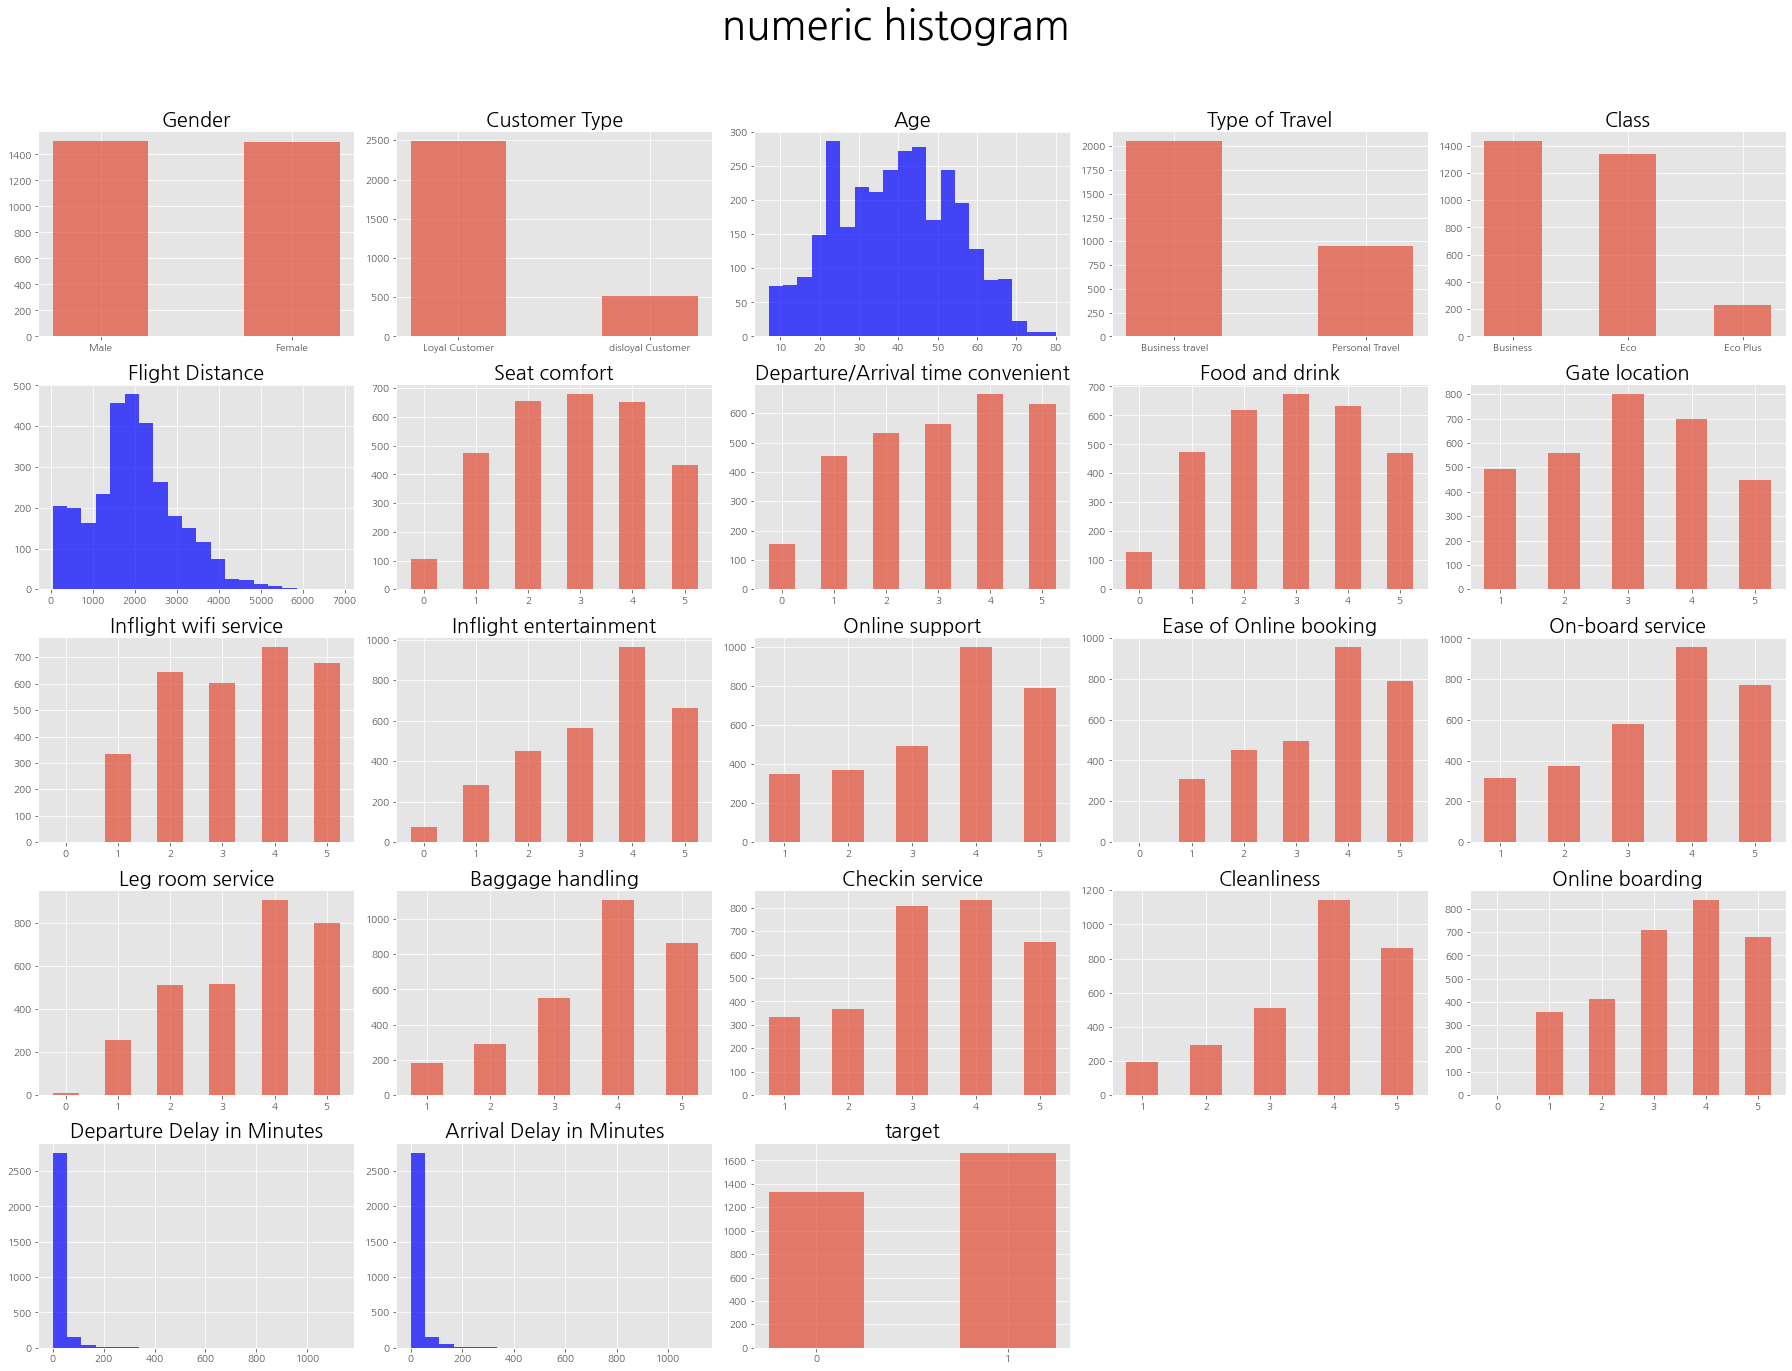

In [102]:
numeric_histogram(train)

### lastdefiance20 님 코드 참고
#  



데이터 훑어볼 때 두가지 우선적으로 살펴보기!
- 데이터의 분포가 상대적으로 매우 적은지 => 매우 적다면 범주를 합치거나 하는 등의 변환이 필요함
- 데이터의 분포가 극단적으로 치우쳐 있는지 => log 변환 등의 방법을 통해 정규화해주는 작업이 필요함  
#    


위의 일변량 그래프에서 주목해야할 점!
- Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 등의 그래프가 왼쪽으로 치우쳐져 있다는 점
- Leg room service 등 1~5를 가진 feature중에서 0값의 분포가 매우 적다는 점

#   
수치형 데이터 박스플랏
- Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes에 이상치들이 보임


# 데이터 분류하기

#   
## 데이터의 속성에 따라서 numeric, ordinal, categorical로 나누어 분류
numeric feature = 숫자형 자료 -> Flight Distance 등의 숫자형 데이터.
  
ordinal feature = 순서형 자료 -> Seat comfort 등 (매우만족 > 만족 > 보통 > 불만족 > 매우불만족)의 설문순서를 가진 데이터.
  
categorical feature = 범주형 자료 -> 남자 / 여자 등 범주별로 나눠진 데이터.

In [103]:
numeric_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

ordinal_features = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

no_features = numeric_features + ordinal_features

categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

target_feature = ["target"]



# EDA

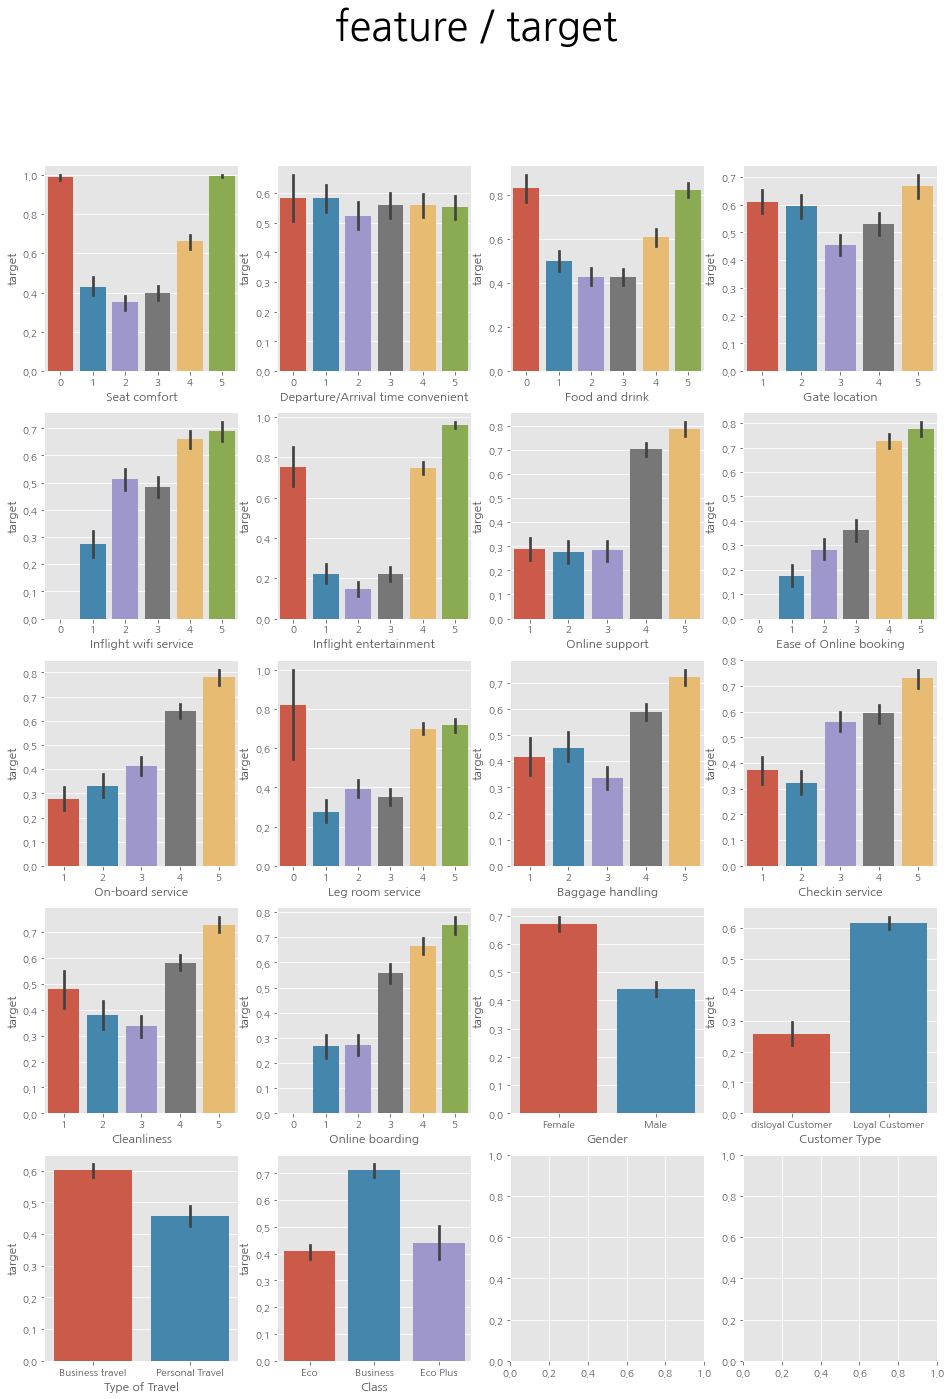

In [106]:
fig, ax = plt.subplots(5, 4, figsize = (16, 22))

plt.suptitle("feature / target", fontsize=40)

feature = ordinal_features + categorical_features

xvalue = 0
yvalue = 0

for xstr in feature:
    sns.barplot(x = xstr, y = 'target', data = train, ax = ax[yvalue][xvalue])
        
    if xvalue == 3:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

## 여기서 주목해야 할 점은 0에서 5로 이루어진 ordinal features 데이터에서 0의 의미!

### 

- 0에서 5의 범위를 우리가 만족도라고 생각할 경우 0은 매우 나쁨, 5는 매우 좋음 이라고 생각 할 수 있음  


- 5에 가가울 수록 전체적인 만족도가 높은 것을 보면 띵킹이 맞다고 봄


- **그러나** 0의 경우에는 데이터의 수가 적고, 어떤 때는 만족도가 5일 때보다 target의 확률이 높은 모습을 보여주고 있음


- 따라서 1~5의 값을 만족도로 보고 0을 다른 의미로 봐야함


- 0을 누락된 결측치나 ,nan을 0으로 채워 놓은 것이라고 생각할 수 있음! 
    
    - 따라서 0을 1로 합치거나 0 ~ 5로 라벨 인코딩을 하면 안된다는 것임!
            

In [111]:
def numeric_boxplots(df):
    
    plt.style.use("ggplot")

    feature = numeric_features + ordinal_features + target_feature

    # Boxplot을 이용해서 데이터의 분포 살펴보기

    plt.figure(figsize = (20,15))
    plt.suptitle("수치형데이터 - boxplot", fontsize = 40)

    for i in range(len(feature)) :
        plt.subplot(5,4,i+1)
        plt.title(feature[i], color = "black")
        plt.boxplot(df[feature[i]])
    plt.show()

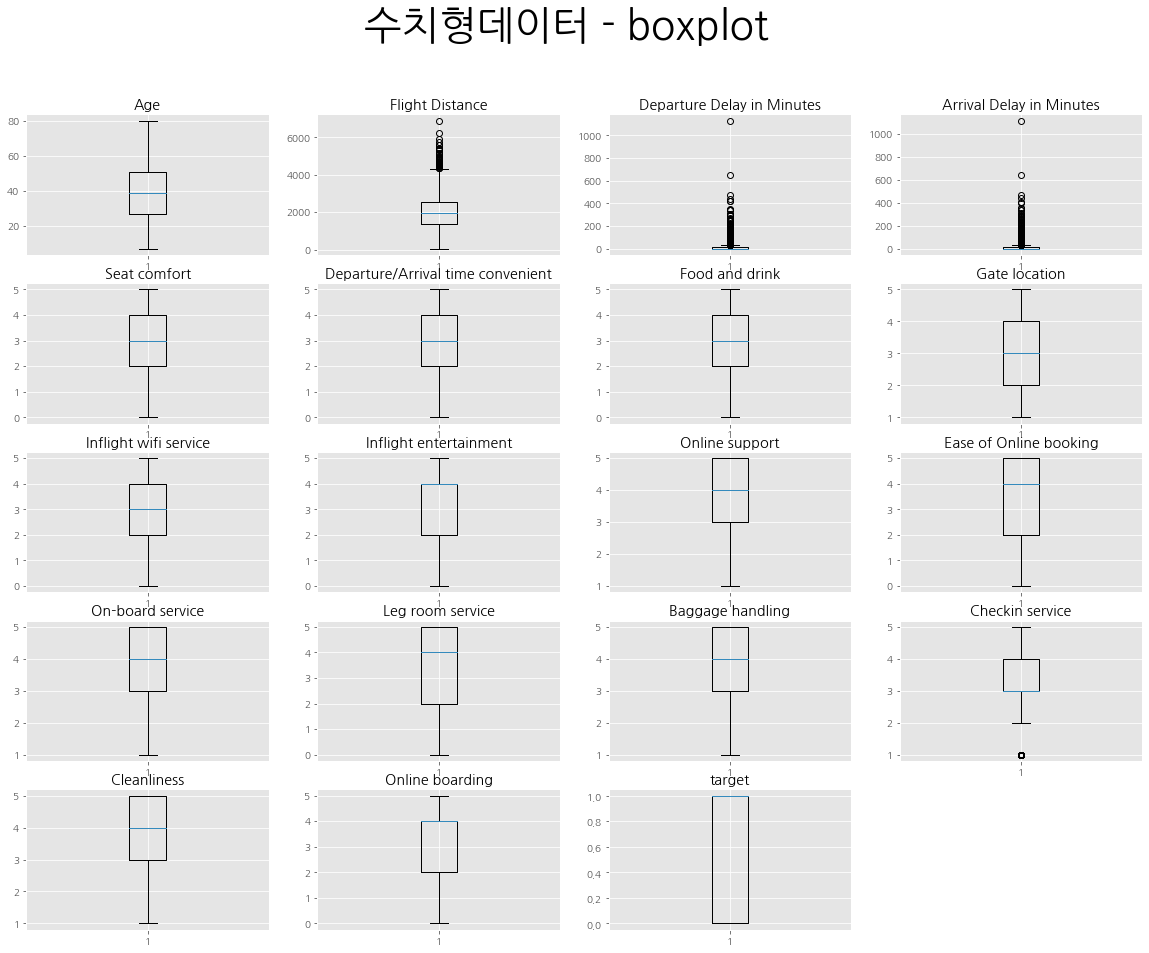

In [112]:
numeric_boxplots(train)



성지코딩님 코드 참고
- 박스들이 중간에 있을 수록 이상치가 없을수록 골고루 분포되어 있는것으로 해석할 수 있음
- 즉 target이 0이던 1이던 골고루 있다는 것은 그렇게 중요한 특징이 아니라는 것


In [115]:
def numeric_vs_target(df):    
    
    # 수치형 데이터 분리
    #numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
    num_data = df[numeric_features + ordinal_features + target_feature]

    # 박스플롯
    fig, axes = plt.subplots(4, 5, figsize=(25, 20))

    fig.suptitle('수치형 vs target', fontsize= 40)
    for ax, col in zip(axes.flat, num_data.columns[:-1]):
       
        sns.boxplot(x= 'target', y= col, ax=ax, data=num_data)
        ax.set_title(col, fontsize=20,color = "b")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

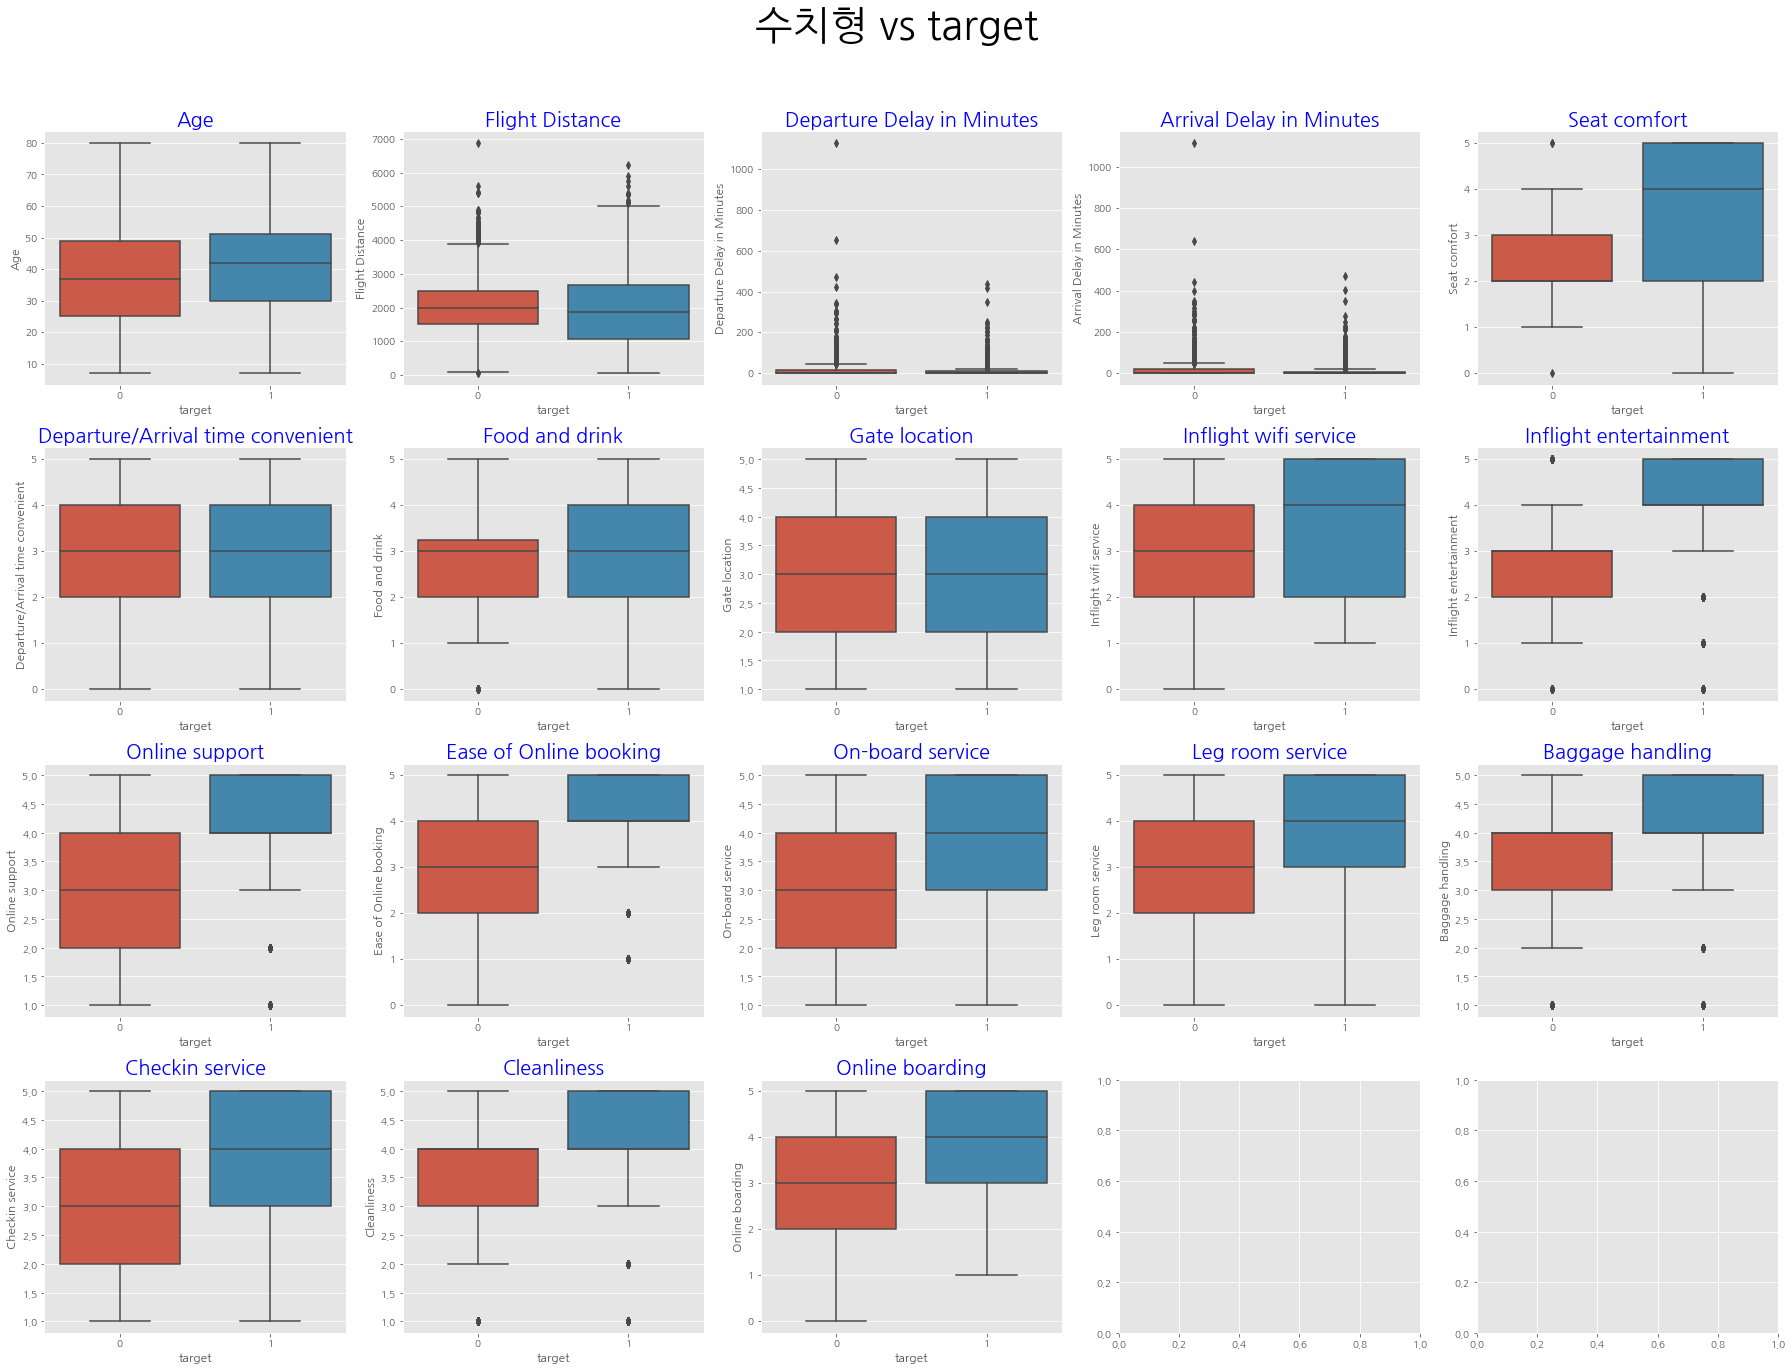

In [116]:
numeric_vs_target(train)

In [117]:
def categorical_vs_target(df):    
    
    # 타겟 설정
    target = "target"
    # 범주형 데이터 분리
    categorical_feature = df.columns[df.dtypes=='object']

    plt.figure(figsize=(20,15))
    plt.suptitle("Violin Plot", fontsize=40)

    # id는 제외하고 시각화합니다.
    for i in range(len(categorical_feature)):
        plt.subplot(2,2,i+1)
        plt.xlabel(categorical_feature[i])
        plt.ylabel(target)
        sns.violinplot(x= df[categorical_feature[i]], y= df[target])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [118]:
categorical_features

['Gender', 'Customer Type', 'Type of Travel', 'Class']

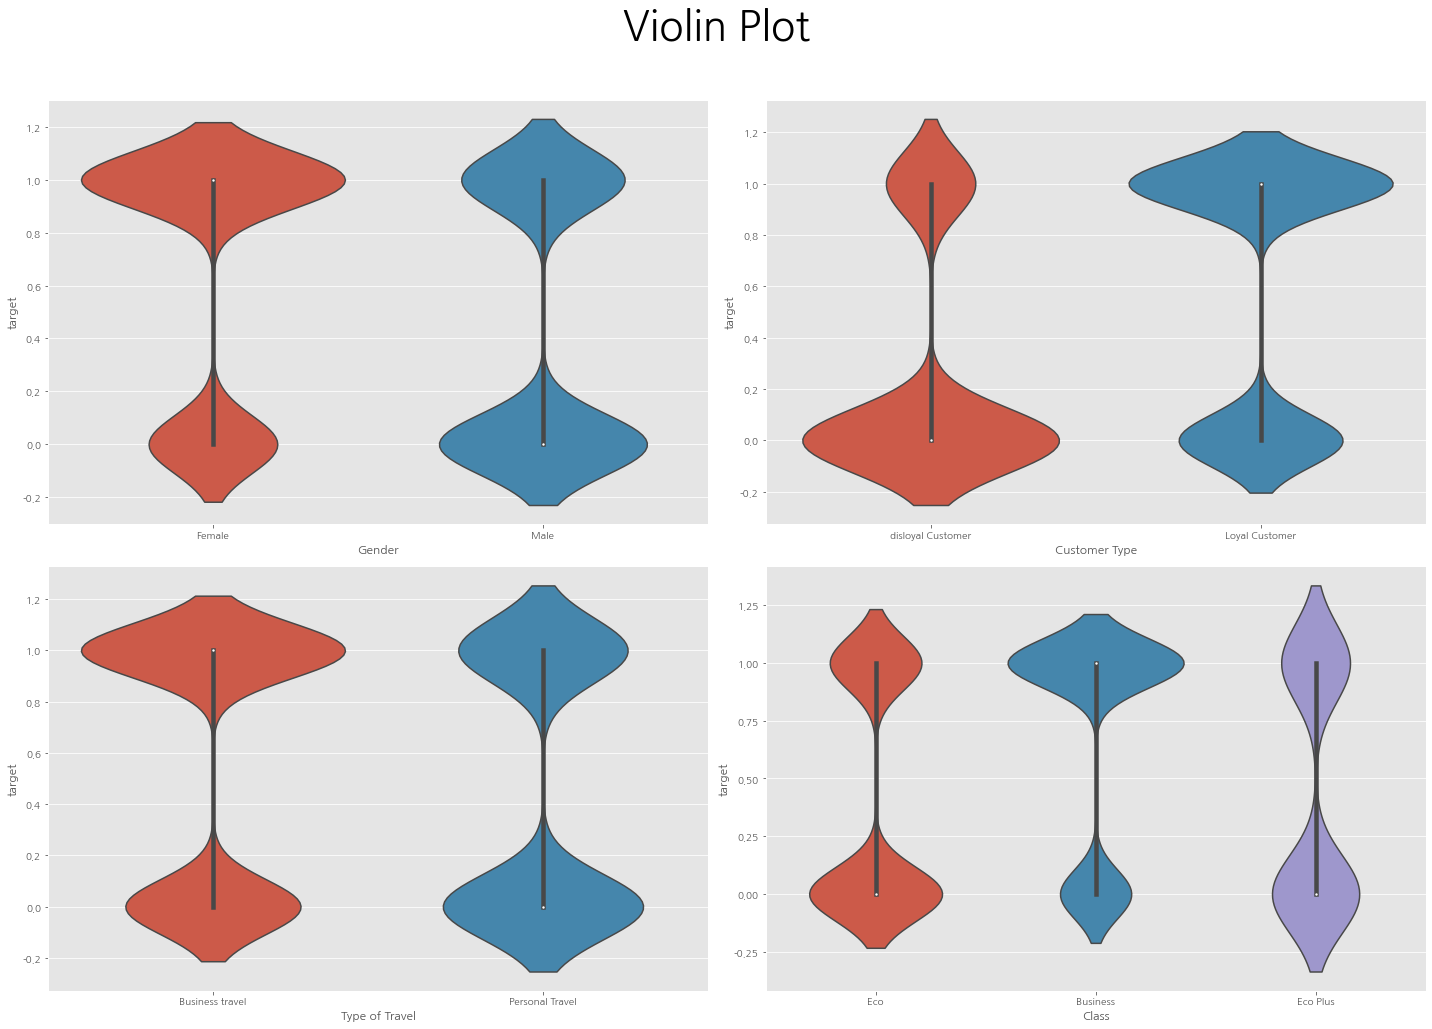

In [119]:
categorical_vs_target(train)

- gender의 경우 1은 여자가 많고 0은 남자가 많음
- Customer Type의 경우 disloyal customer와 Loyal customer에 남녀 차이가 남
- Type of Travel도 여자가 1이 많음
- Ckass의 경우 Business가 1이 많음 eco와 eco plus는 비슷

# 상관계수 확인

# 
- target을 기준으로 상관계수 값을보면 Inlflight entertainment, Online support, Ease of Online booking 등등이 높은 상관계수 값을 보임

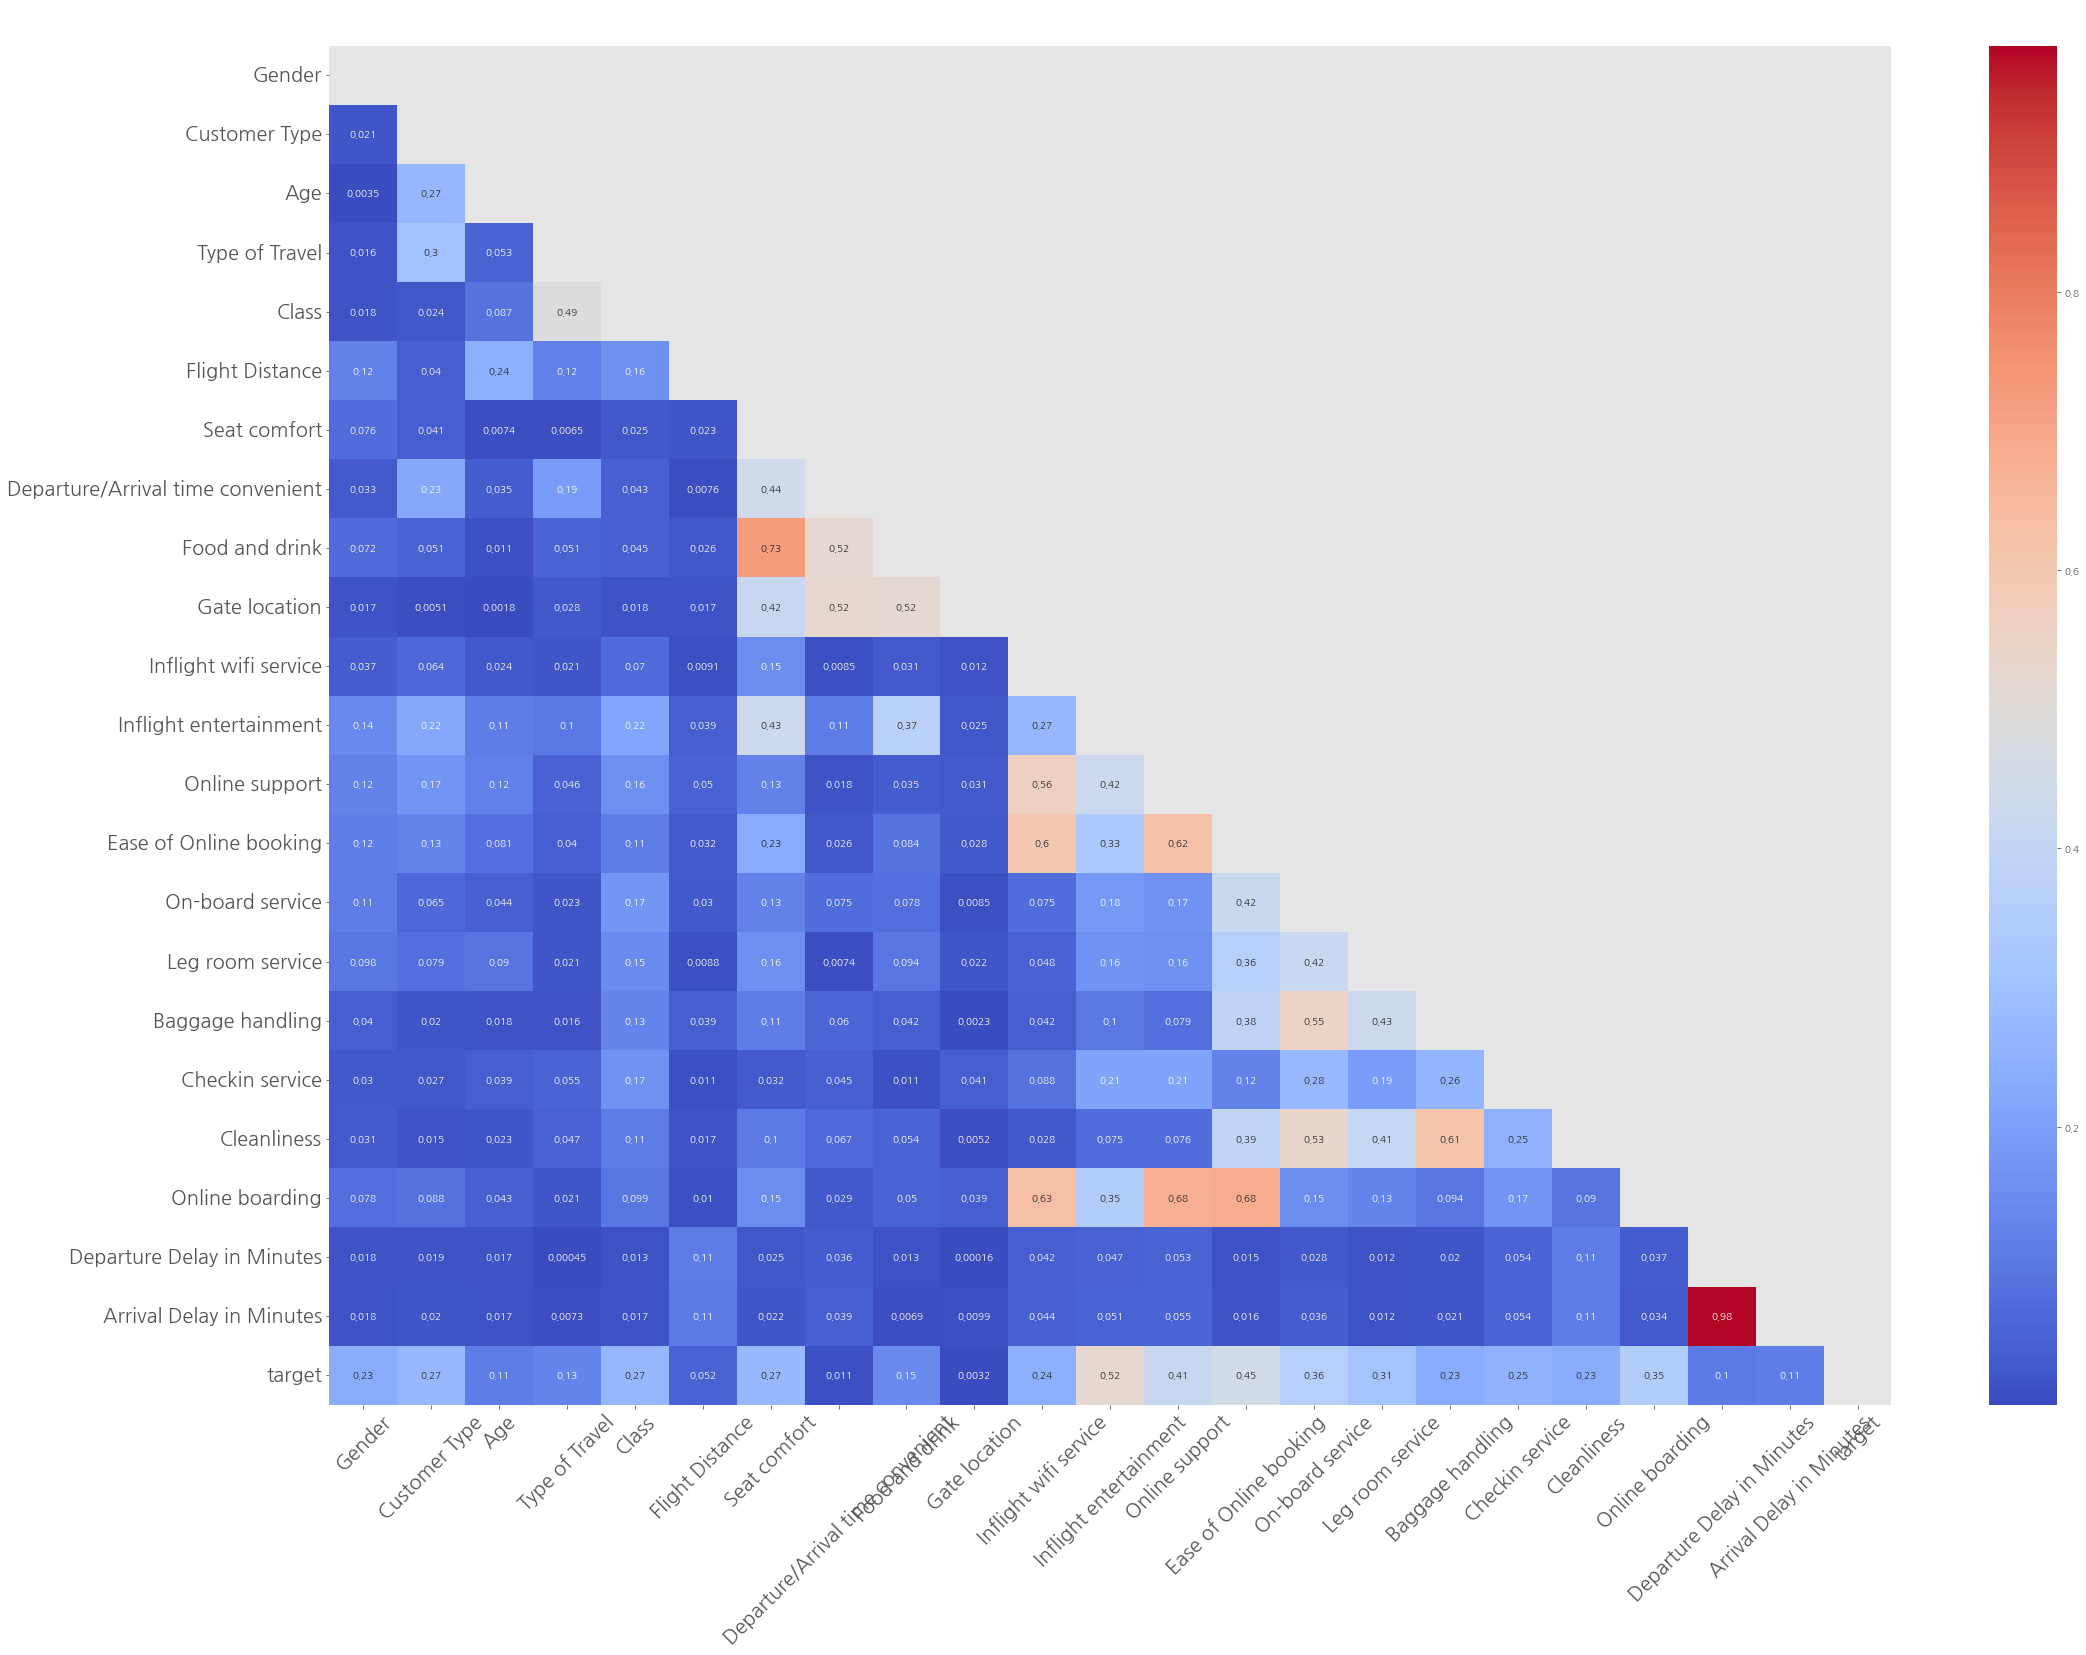

In [120]:
corr_df = train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

plt.figure(figsize=(35,25))

heat_table = abs(corr_df.corr())
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=20, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=20)
plt.title('correlation between features', fontsize=40)
plt.show()

In [121]:
abs(corr_df.corr()["target"]).sort_values(ascending = False)

target                               1.000000
Inflight entertainment               0.522935
Ease of Online booking               0.447784
Online support                       0.411944
On-board service                     0.359699
Online boarding                      0.351370
Leg room service                     0.311086
Customer Type                        0.271471
Seat comfort                         0.271270
Class                                0.267565
Checkin service                      0.248975
Inflight wifi service                0.242427
Cleanliness                          0.234848
Gender                               0.233619
Baggage handling                     0.232302
Food and drink                       0.145126
Type of Travel                       0.133565
Arrival Delay in Minutes             0.112338
Age                                  0.107226
Departure Delay in Minutes           0.104975
Flight Distance                      0.052059
Departure/Arrival time convenient 

### log 씌운 상관관계

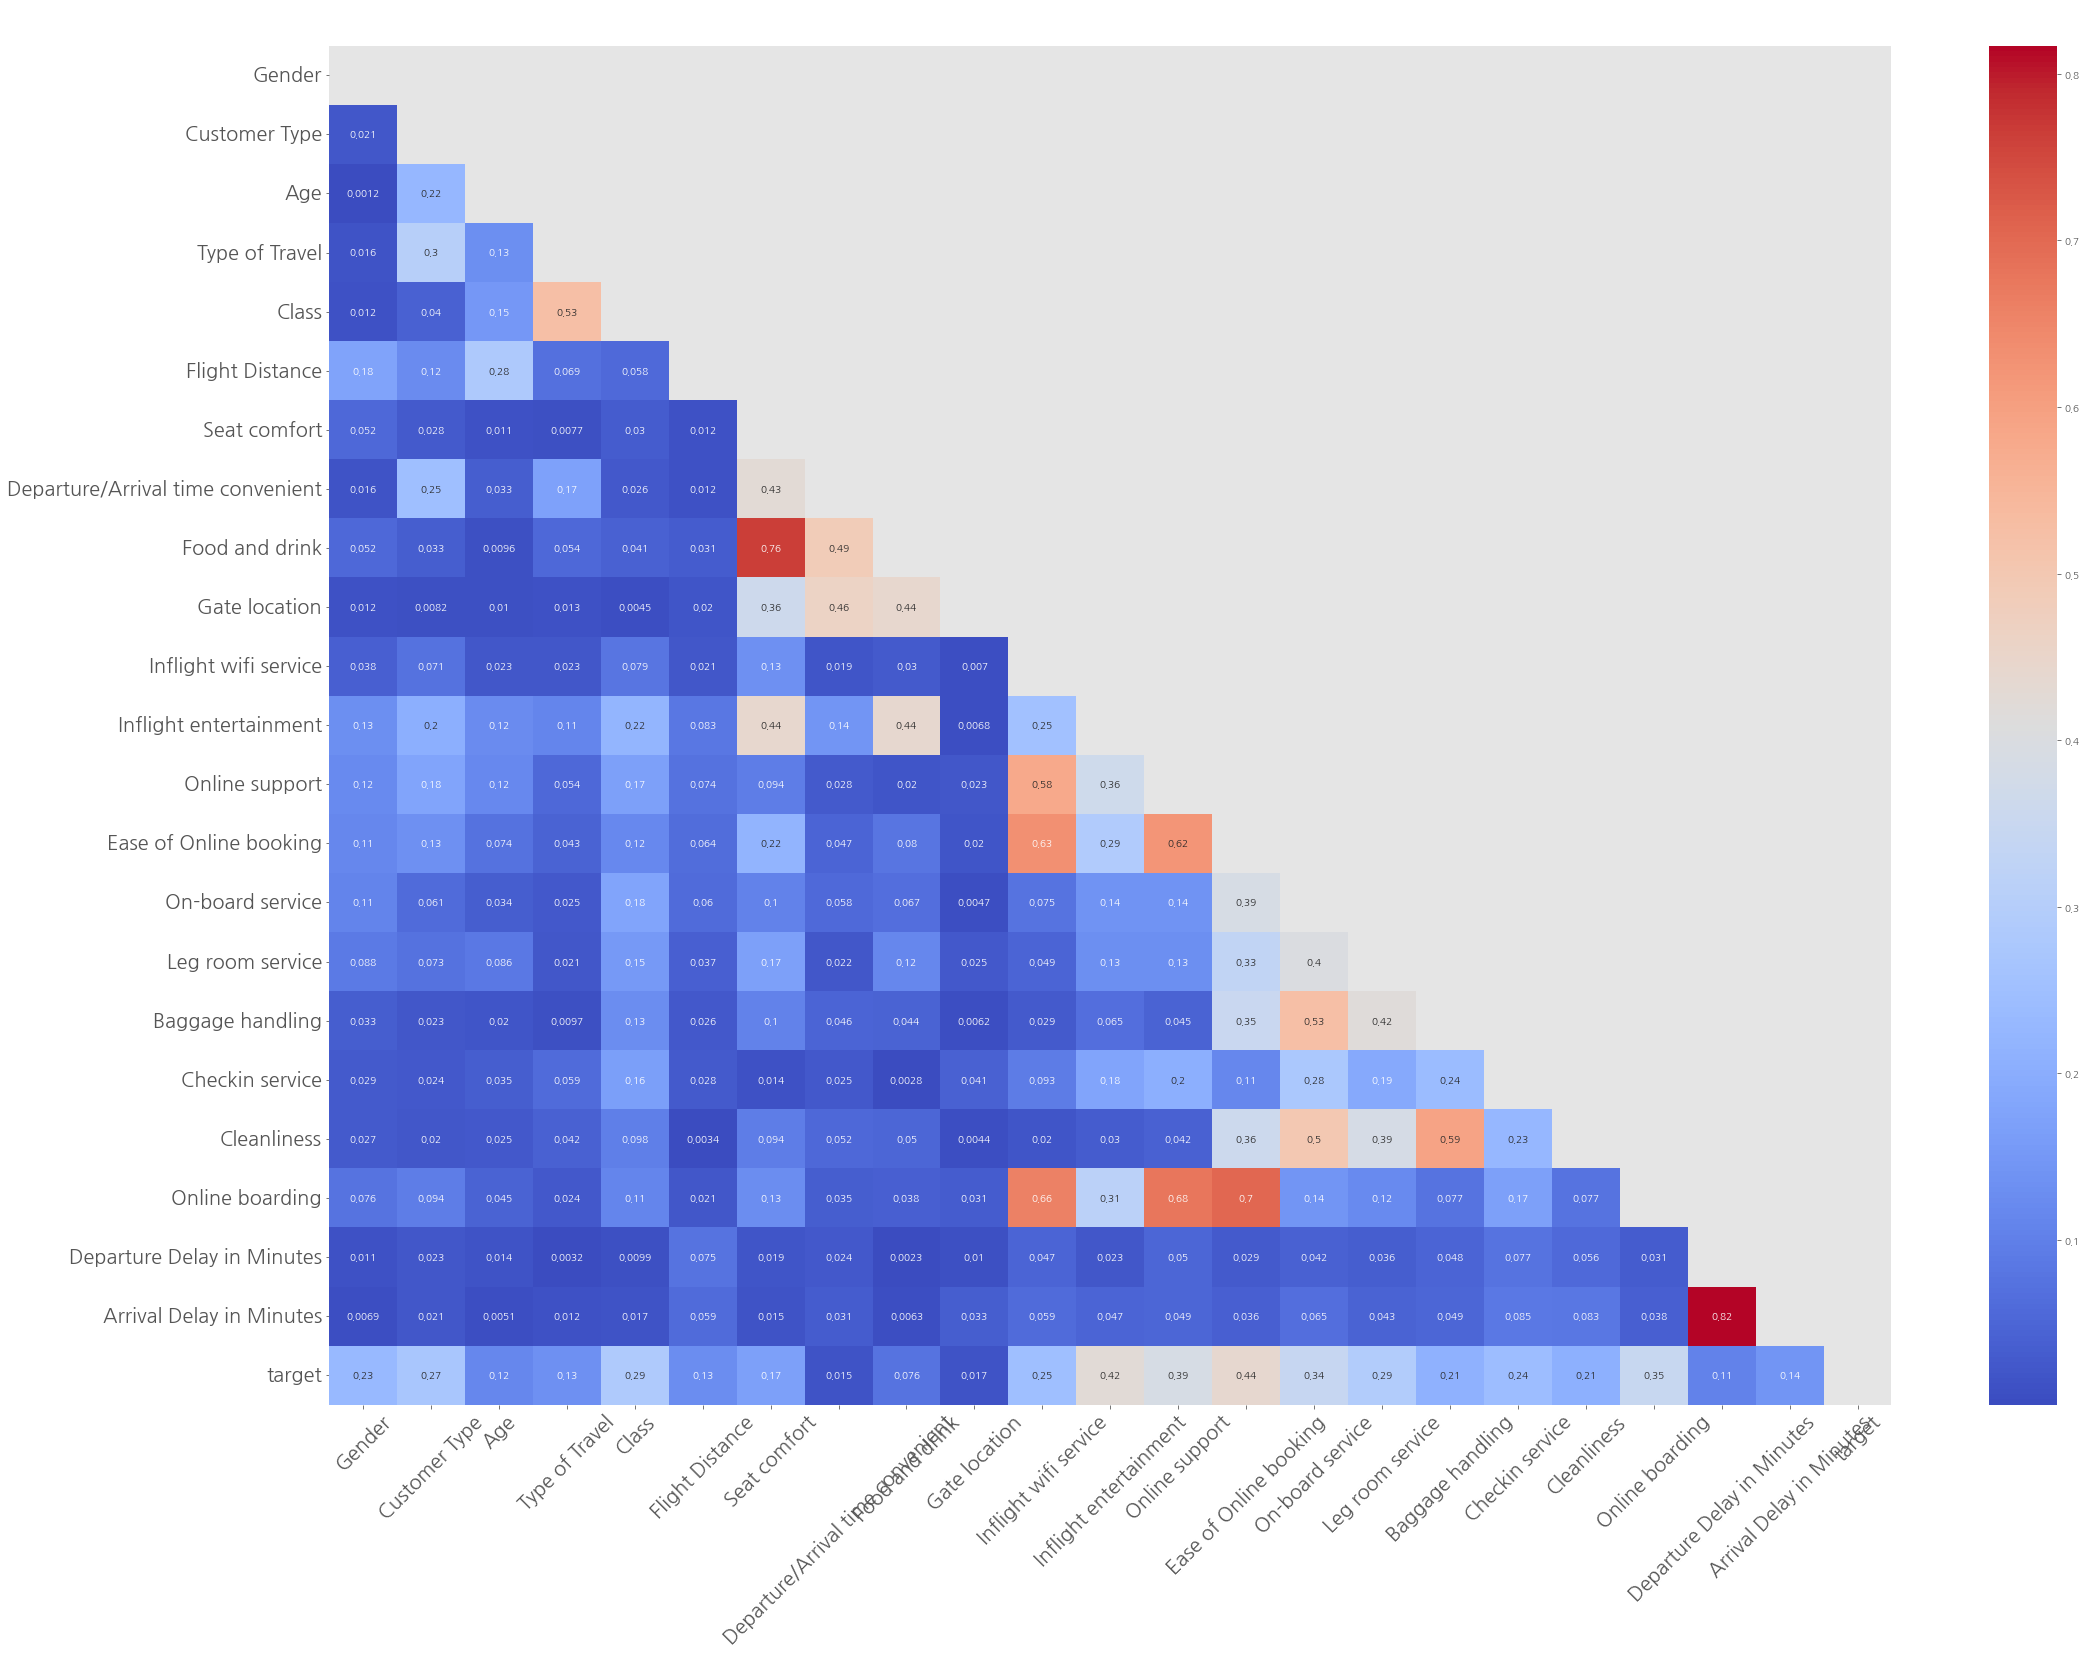

In [122]:
corr_df = train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)
corr_df = np.log1p(corr_df)

plt.figure(figsize=(35,25))

heat_table = abs(corr_df.corr())
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=20, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=20)
plt.title('correlation between features', fontsize=40)
plt.show()

In [123]:
abs(corr_df.corr()["target"]).sort_values(ascending = False)

target                               1.000000
Ease of Online booking               0.438723
Inflight entertainment               0.422583
Online support                       0.388458
Online boarding                      0.348431
On-board service                     0.343871
Leg room service                     0.293636
Class                                0.285200
Customer Type                        0.271471
Inflight wifi service                0.247707
Checkin service                      0.241159
Gender                               0.233619
Baggage handling                     0.209196
Cleanliness                          0.206762
Seat comfort                         0.169981
Arrival Delay in Minutes             0.142003
Type of Travel                       0.133565
Flight Distance                      0.126354
Age                                  0.115427
Departure Delay in Minutes           0.105554
Food and drink                       0.075941
Gate location                     

## Departure Delay in Minutes 와 Arrival Delay in Minutes에 대하여

- 출발시간이 지연되면 당연히 도착시간도 지연됨   
- 둘의 상관계수는 0.98로 매우 높은 상관관계를 가짐   
- 관련 키워드는 다중 공선성.   
    - 즉 target이 아닌 특징들에 대하여 서로 **독립적**인 관계여야 함
    - 위의 두 특징은 서로 독립적인 관계가 아니고 거의 하나로 움직이게 됨. 주로 상관계수가 0.7이상일 때 다중 공선성이 나타난다고 함
    - 0.7 이상의 특징쌍이 하나 더 보임. 'Food and drink' 와 'Seat confort'. 좌석의 편리성과 음식 관계는 비싼 좌석일수록 자리가 편하고 음식이 잘 나오므로 높게 나타난것으로 추정
    
    - 다중 공선성 처리 방법중 가장 간단한 방법은 둘 중 한 특징을 제거하는 것
        - 2개의 쌍 중 target과의 상관계수가 낮은 특징을 제거할 계획
        - Departure Delay in Minutes & Arrival Delay in Minutes (target과의 상관관계 : 0.1 & 0.11) => Departure Delay in Minutes 제거
        - Food and drink & Seat confort (target과의 상관관계 : 0.15 & 0.27) => Food and drink 제거

# 데이터 정제하기
## 1. Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 그래프가 왼쪽으로 치우쳐져 있다는 점

In [171]:
train_df = train.copy()
test_df = test.copy()

In [172]:
#log 변환 실행

train_df['Departure Delay in Minutes'] = np.log1p(train_df['Departure Delay in Minutes'])
train_df['Arrival Delay in Minutes'] = np.log1p(train_df['Arrival Delay in Minutes'])

#test 데이터에도 변환 실행

test_df['Departure Delay in Minutes'] = np.log1p(test_df['Departure Delay in Minutes'])
test_df['Arrival Delay in Minutes'] = np.log1p(test_df['Arrival Delay in Minutes'])

## 2. 새로운 컬럼 생성. 상관계수값이 낮은 컬럼들 하나로 묶기

In [173]:
 train_df["option1"] = round((train_df["Checkin service"] + train_df["Inflight wifi service"] + train_df["Cleanliness"]\
                        + train_df["Baggage handling"] + train_df["Food and drink"])/5)
    
 test_df["option1"] = round((test_df["Checkin service"] + test_df["Inflight wifi service"] + test_df["Cleanliness"]\
                        + test_df["Baggage handling"] + test_df["Food and drink"])/5)

상관계수값을 보면 새로운컬럼 option1의 target과의 상관계수값이 0.37로 괜찮게 나왔습니다.

In [174]:
abs(train_df.corr()["target"]).sort_values(ascending = False)

target                               1.000000
Inflight entertainment               0.522935
Ease of Online booking               0.447784
Online support                       0.411944
option1                              0.378198
On-board service                     0.359699
Online boarding                      0.351370
Leg room service                     0.311086
Seat comfort                         0.271270
Checkin service                      0.248975
Inflight wifi service                0.242427
Cleanliness                          0.234848
Baggage handling                     0.232302
Food and drink                       0.145126
Arrival Delay in Minutes             0.142003
Age                                  0.107226
Departure Delay in Minutes           0.105554
Flight Distance                      0.052059
Departure/Arrival time convenient    0.010653
Gate location                        0.003213
Name: target, dtype: float64

필요없는 컬럼 drop

In [176]:
train_df.drop(columns = ["Checkin service" , "Inflight wifi service", "Cleanliness", "Baggage handling", "Food and drink",\
                         "Age", "Flight Distance","Departure/Arrival time convenient","Gate location"], axis = 1, inplace = True )
test_df.drop(columns = ["Checkin service" , "Inflight wifi service", "Cleanliness", "Baggage handling", "Food and drink", \
                         "Age", "Flight Distance","Departure/Arrival time convenient","Gate location"], axis = 1, inplace = True )

## 3. Leg room service 등 1 ~ 5를 가진 features들 중에서 0 값은 Null값, 결측치이다

In [177]:
pre_ordinal_features = ordinal_features.copy()
pre_ordinal_features.remove("Checkin service")
pre_ordinal_features.remove("Inflight wifi service")
pre_ordinal_features.remove("Cleanliness")
pre_ordinal_features.remove("Baggage handling")
pre_ordinal_features.remove("Food and drink")
pre_ordinal_features.remove("Departure/Arrival time convenient")
pre_ordinal_features.remove("Gate location")

print(pre_ordinal_features)

['Seat comfort', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Online boarding']


In [179]:
print(f"*** Train 데이터에서 missing value ***\n")

for feature in pre_ordinal_features:
    if len(train_df[train_df[feature] == 0]) > 0:
        print(f"{feature} 피처에서 결측치 개수는 {len(train_df[train_df[feature] == 0])} 개 입니다.\t 상관계수 => {abs(train_df.corr()['target'])[feature]}")
 
print("\n")
print("--" * 30,"\n")

print(f"*** Test 데이터에서 missing value ***\n")

for feature in pre_ordinal_features:
    if len(test_df[test_df[feature] == 0]) > 0:
        print(f"{feature} 피처에서 결측치 개수는 {len(test_df[test_df[feature] == 0])} 개 입니다.")

*** Train 데이터에서 missing value ***

Seat comfort 피처에서 결측치 개수는 106 개 입니다.	 상관계수 => 0.2712703903479416
Inflight entertainment 피처에서 결측치 개수는 73 개 입니다.	 상관계수 => 0.5229351675815876
Ease of Online booking 피처에서 결측치 개수는 1 개 입니다.	 상관계수 => 0.44778395876300653
Leg room service 피처에서 결측치 개수는 11 개 입니다.	 상관계수 => 0.3110860810363194
Online boarding 피처에서 결측치 개수는 1 개 입니다.	 상관계수 => 0.3513703919664769


------------------------------------------------------------ 

*** Test 데이터에서 missing value ***

Seat comfort 피처에서 결측치 개수는 64 개 입니다.
Inflight entertainment 피처에서 결측치 개수는 39 개 입니다.
Leg room service 피처에서 결측치 개수는 10 개 입니다.


train 데이터에서 결측치가 1개인 Ease of Online booking과 Online boarding먼저 간단히 처리하겠습니다.

In [180]:
corr_matrix = train_df.corr()
corr_matrix["Online boarding"].sort_values(ascending = False)[:5]

Online boarding           1.000000
Ease of Online booking    0.684511
Online support            0.675139
Inflight entertainment    0.353772
option1                   0.353721
Name: Online boarding, dtype: float64

In [181]:
train_df[(train_df["Online boarding"] == 0) | (train_df["Ease of Online booking"] ==0)] # Ease of Online booking 값도 0이므로 거의 같은 Online support 값으로 대체

,Gender,Customer Type,Type of Travel,Class,Seat comfort,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target,option1
2154,Male,Loyal Customer,Business travel,Eco,0,1,3,0,4,4,0,0.0,0.0,0,2.0


In [182]:
train_df["Ease of Online booking"][train_df["Ease of Online booking"] == 0] = 3
train_df["Online boarding"][train_df["Online boarding"] == 0] = 3

In [183]:
print(f"*** Train 데이터에서 missing value ***\n")

for feature in pre_ordinal_features:
    if len(train_df[train_df[feature] == 0]) > 0:
        print(f"{feature} 피처에서 결측치 개수는 {len(train_df[train_df[feature] == 0])} 개 입니다.\t 상관계수 => {abs(train_df.corr()['target'])[feature]}")
 
print("\n")
print("--" * 30,"\n")

print(f"*** Test 데이터에서 missing value ***\n")

for feature in pre_ordinal_features:
    if len(test_df[test_df[feature] == 0]) > 0:
        print(f"{feature} 피처에서 결측치 개수는 {len(test_df[test_df[feature] == 0])} 개 입니다.")

*** Train 데이터에서 missing value ***

Seat comfort 피처에서 결측치 개수는 106 개 입니다.	 상관계수 => 0.2712703903479416
Inflight entertainment 피처에서 결측치 개수는 73 개 입니다.	 상관계수 => 0.5229351675815876
Leg room service 피처에서 결측치 개수는 11 개 입니다.	 상관계수 => 0.3110860810363194


------------------------------------------------------------ 

*** Test 데이터에서 missing value ***

Seat comfort 피처에서 결측치 개수는 64 개 입니다.
Inflight entertainment 피처에서 결측치 개수는 39 개 입니다.
Leg room service 피처에서 결측치 개수는 10 개 입니다.


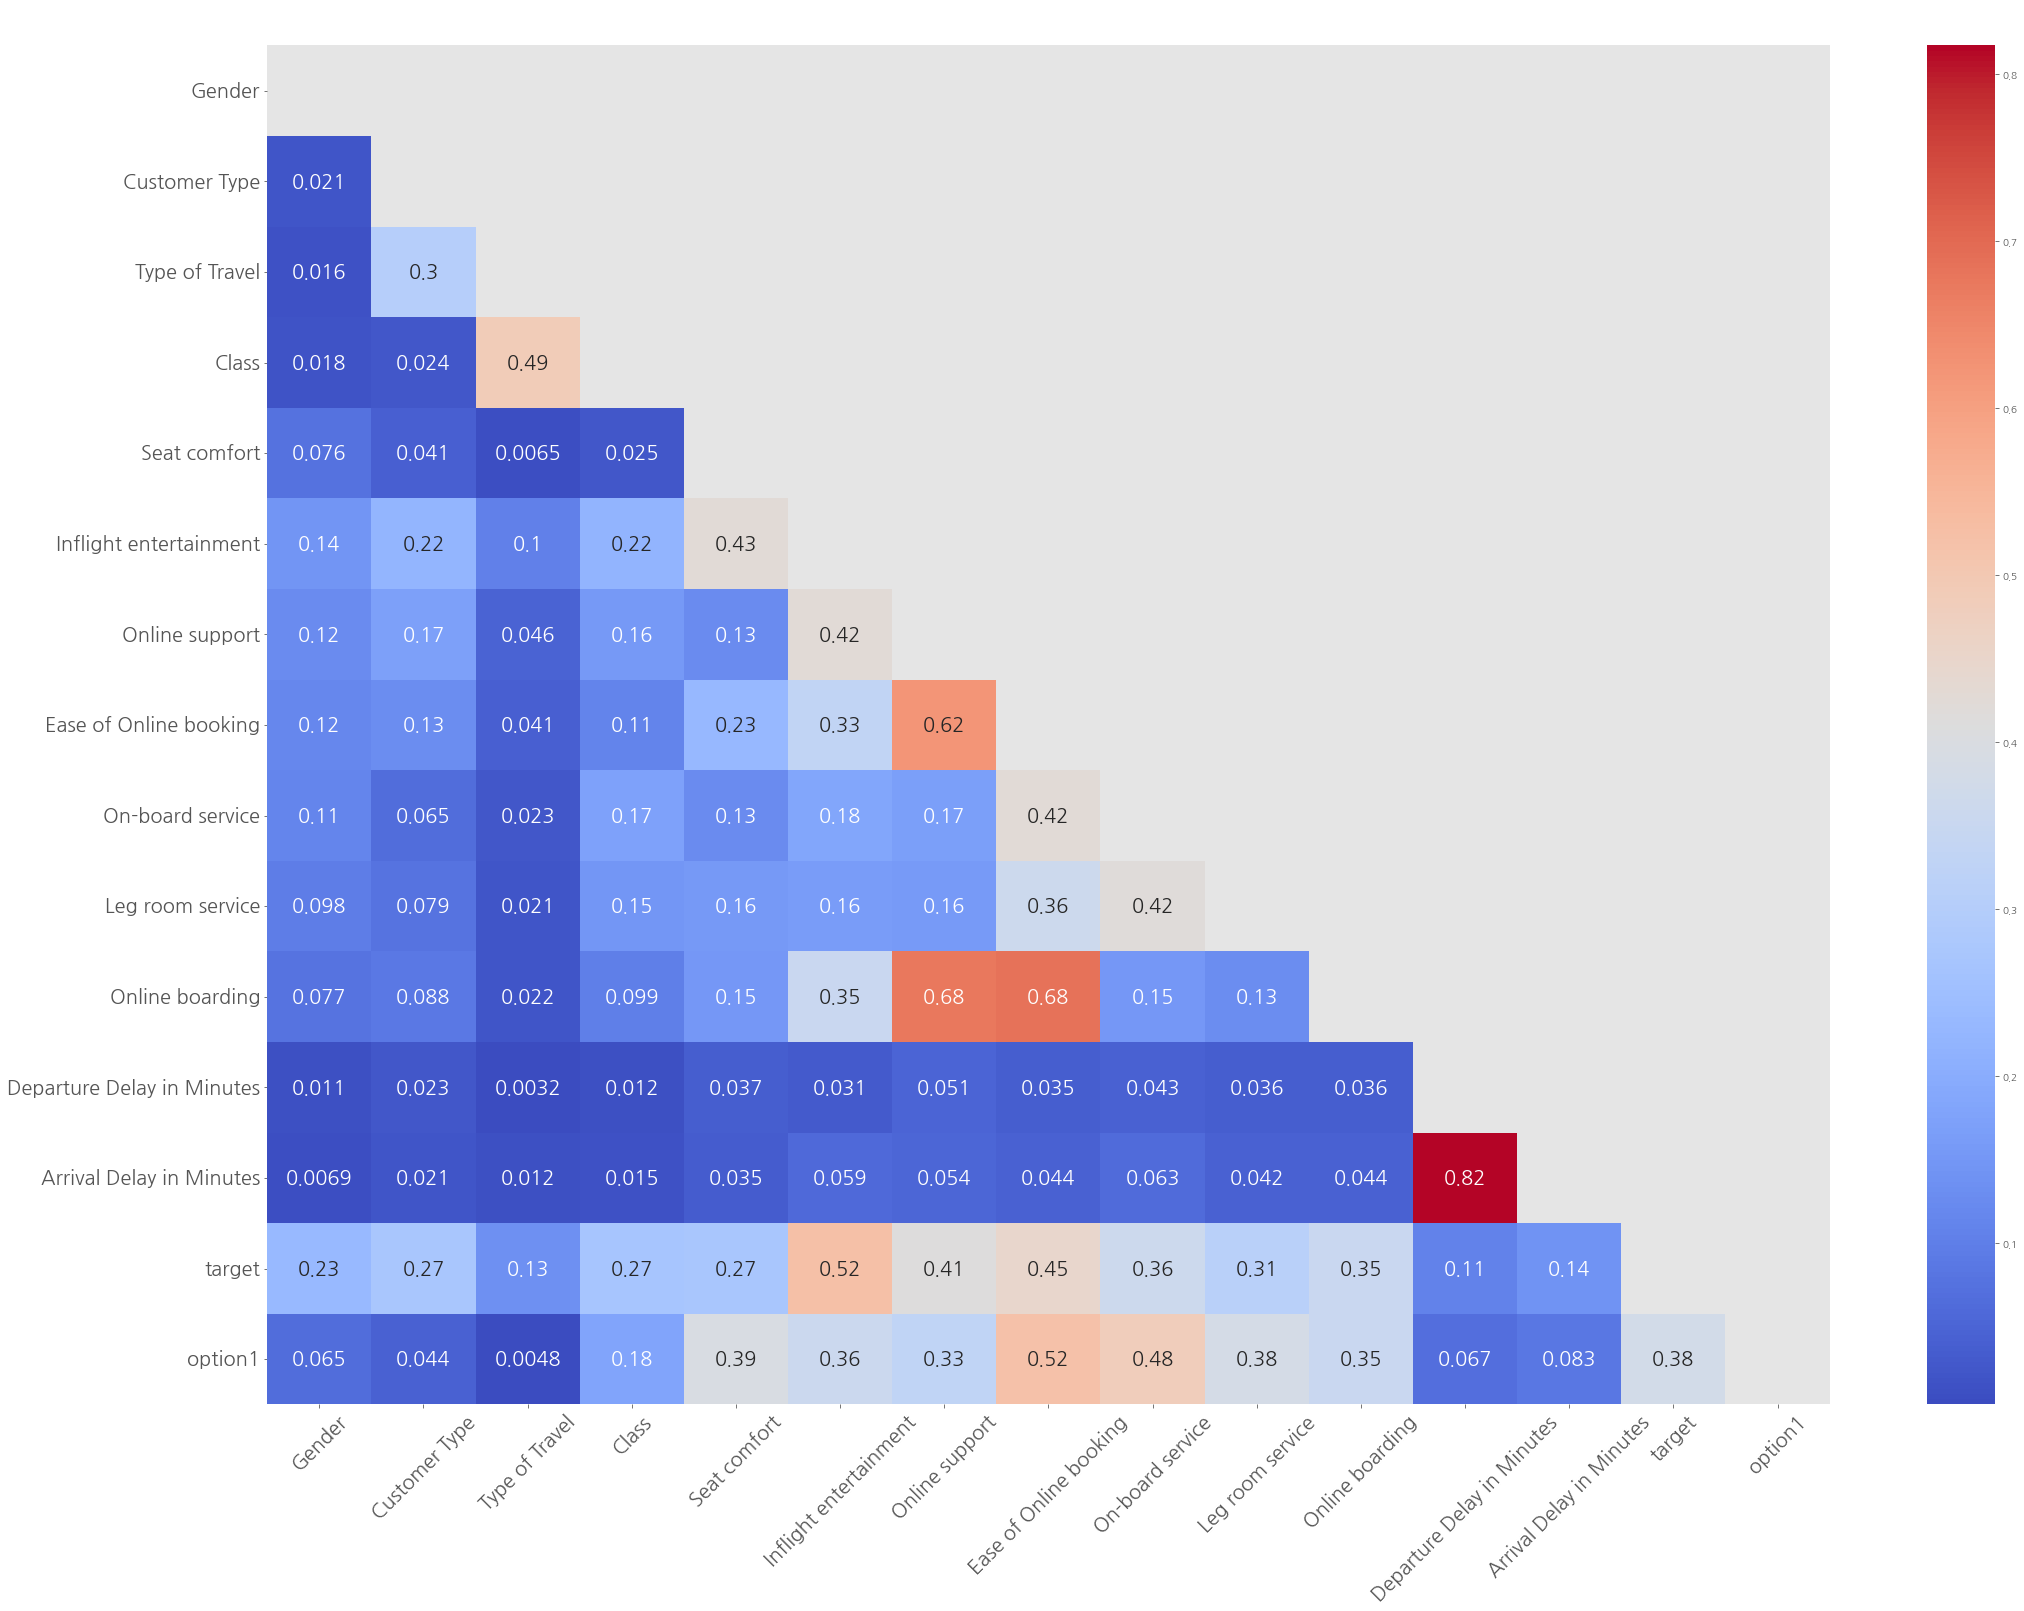

In [184]:
corr_df = train_df.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

plt.figure(figsize=(35,25))

heat_table = abs(corr_df.corr())
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, annot_kws = {"size" : 20},mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=20, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=20)
plt.title('correlation between features', fontsize=40)
plt.show()

In [23]:
# Departure Delay in Minutes 와 Food and drink 컬럼 제거


# train_df = train.copy()
# test_df = test.copy()


train_df.drop("Departure Delay in Minutes", axis = 1, inplace = True)
train_df.drop("Food and drink", axis = 1, inplace = True)

test_df.drop("Departure Delay in Minutes", axis = 1, inplace = True)
test_df.drop("Food and drink", axis = 1, inplace = True)

### 이상치 확인
# 
- Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes에 이상치가 많음(원본데이터를 봤을 때!)
- 이상치는 제거하자!

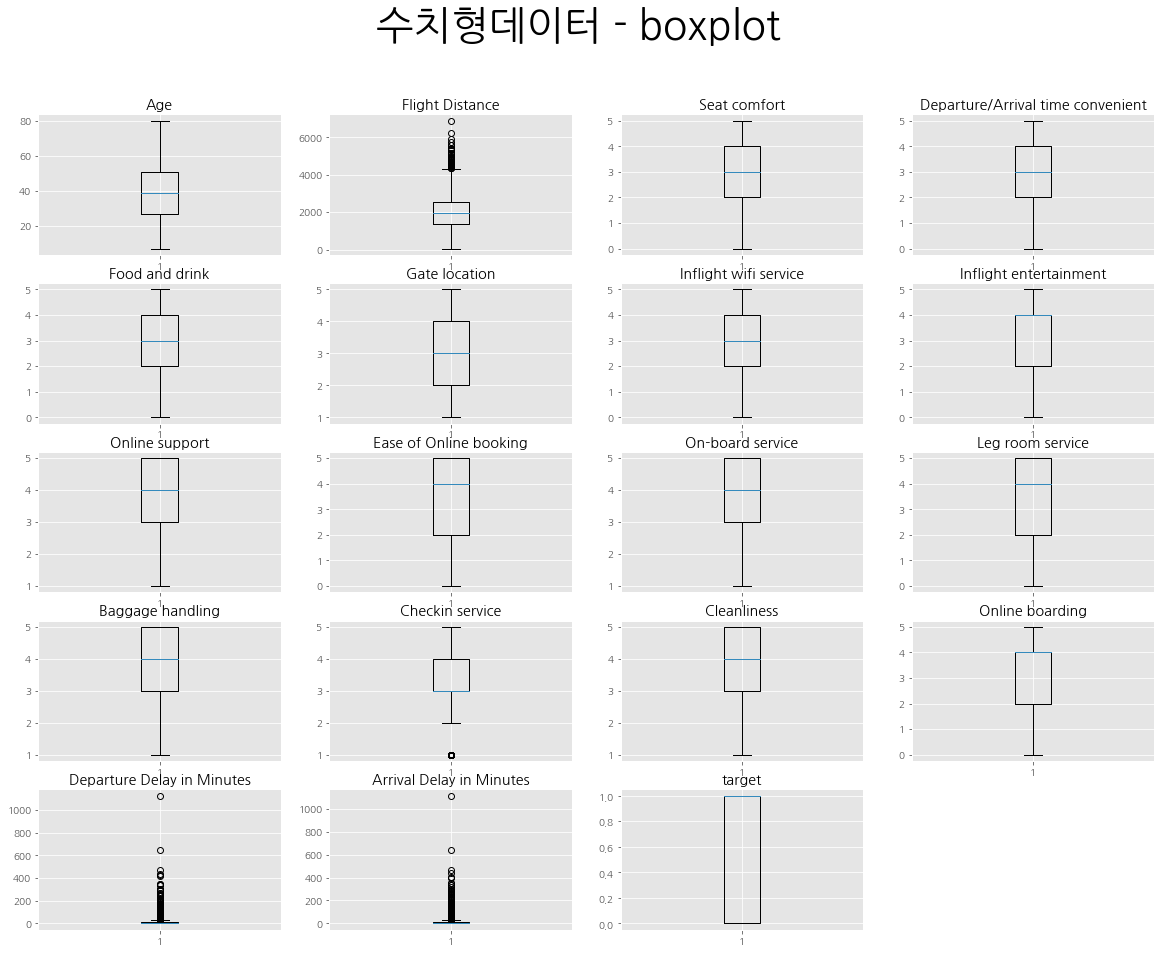

In [24]:
numeric_boxplots(train)

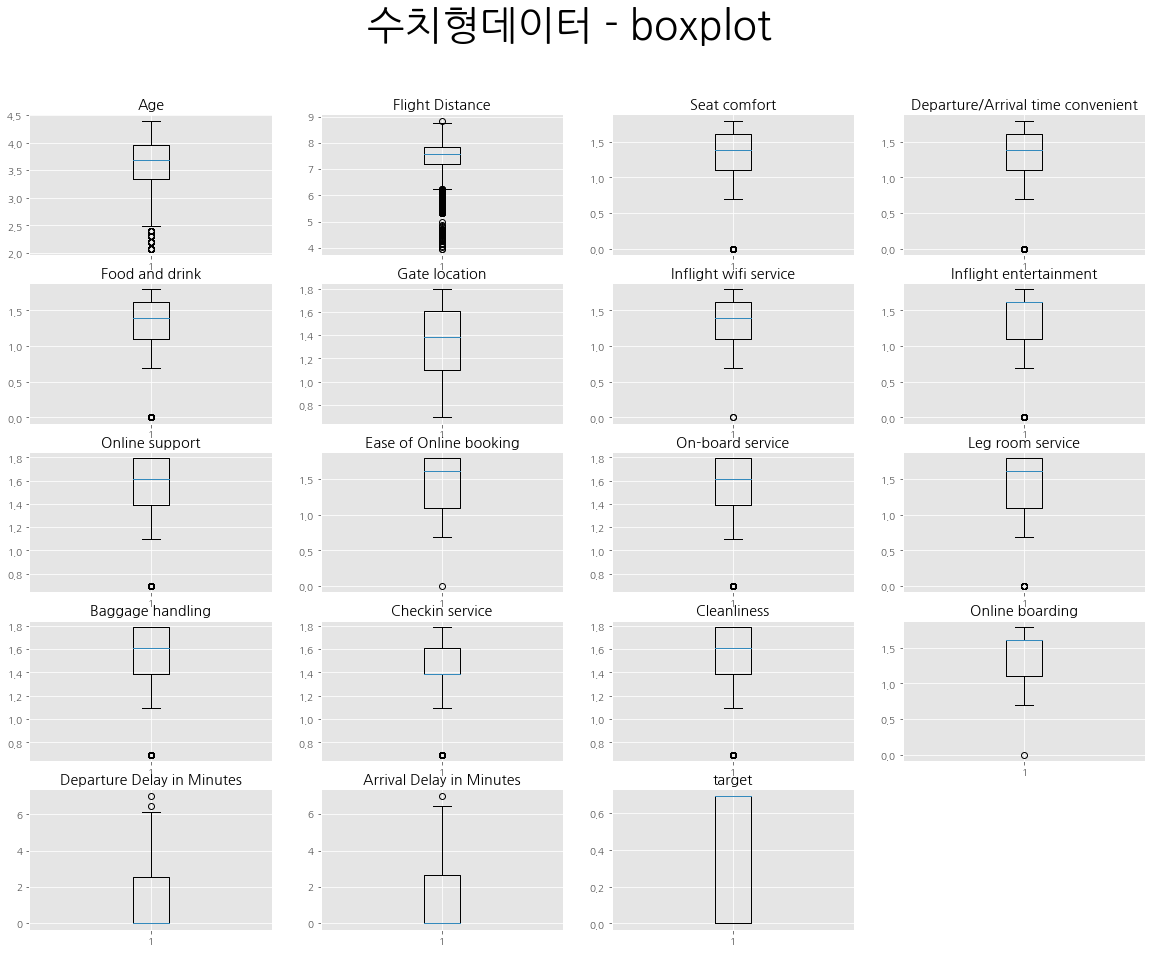

In [33]:
numeric_boxplots(np.log1p(train[numeric_features]))

In [25]:
# 이상치 개수 구하는 함수 정의

def check_outlier(df,columns):
    
    for column in columns :
        
        q1 = df[column].quantile(.25)
        q3 = df[column].quantile(.75)
        iqr = q3 - q1
        
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        
        outlier_count = len(df.loc[(df[column] < low) | (df[column] > high)])
        
        print(f"{column}의 이상치 개수는 {outlier_count} 개 입니다.")

In [26]:
def outlier_index(df):
    
    q1 = df.quantile(.25)
    q3 = df.quantile(.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    return np.where((df > high) | (df < low))

In [27]:
Arrival_Delay_in_Minutes_index = outlier_index(train_df["Arrival Delay in Minutes"])[0]
Flight_Distance_index = outlier_index(train_df["Flight Distance"])[0]
Checkin_service_index = outlier_index(train_df["Checkin service"])[0]

이상치 행 drop하려 했지만 개수가 많아 평균값으로 대체

- Checkin service는 이상치 하나
- Arrival Delay in Minutes와, Flight Distance는 이상치가 꽤 있음
- 평균값말고 회귀분석으로 예측도 해보면 괜찮을 듯!?

In [ ]:
train_df.loc[Arrival_Delay_in_Minutes_index, "Arrival Delay in Minutes"] = train_df["Arrival Delay in Minutes"].mean()
train_df.loc[Flight_Distance_index, "Flight Distance"] = train_df["Flight Distance"].mean()
train_df.loc[Checkin_service_index, "Checkin service"] = train_df["Checkin service"].mean()

In [ ]:
train_df.plot(kind = "box", subplots = True, figsize = (15,21), layout = (5,5))
plt.show()

In [ ]:
Arrival_Delay_in_Minutes_index = outlier_index(test_df["Arrival Delay in Minutes"])[0]
Flight_Distance_index = outlier_index(test_df["Flight Distance"])[0]
Checkin_service_index = outlier_index(test_df["Checkin service"])[0]

test_df.loc[Arrival_Delay_in_Minutes_index, "Arrival Delay in Minutes"] = test_df["Arrival Delay in Minutes"].mean()
test_df.loc[Flight_Distance_index, "Flight Distance"] = test_df["Flight Distance"].mean()
test_df.loc[Checkin_service_index, "Checkin service"] = test_df["Checkin service"].mean()


In [ ]:
test_df.plot(kind = "box", subplots = True, figsize = (15,21), layout = (5,5))
plt.show()

On-board service에서 이상치 171개... 근데 이게 의미가 있을까...?

In [ ]:
check_outlier(test_df, ["On-board service"])

In [ ]:
train_df[train_df["On-board service"]==1].groupby(["On-board service"])["target"].value_counts()

In [32]:
# # 이상치 개수 구하는 함수 정의

# def check_outlier(df,columns):
    
#     for column in columns :
        
#         q1 = df[column].quantile(.25)
#         q3 = df[column].quantile(.75)
#         iqr = q3 - q1
        
#         low = q1 - 1.5 * iqr
#         high = q3 + 1.5 * iqr
        
#         outlier_count = len(df.loc[(df[column] < low) | (df[column] > high)])
        
#         print(f"{column}의 이상치 개수는 {outlier_count} 개 입니다.")

# 원본 데이터 라벨링

- 범주형 데이터
###  
    - Gender : Female, Male
    - Customer Type : disloyal Customer, Loyal Customer
    - Type of Travel : Business Travel , Personal Travel
    - Class : Eco, Business, Eco Plus
### 
- Gender는 원핫인코딩..?
- Customer Type, Type of Travel도 원핫? 차이가 있긴 함
- Class에서 Business는 차이가 남 Eco, Eco Plus는 차이가 별로...

In [34]:
# # 데이터 셋
# train_df[train_df.columns[train_df.dtypes=='O']] = train_df[train_df.columns[train_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

# # 테스트 셋
# test_df[test_df.columns[test_df.dtypes=='O']] = test_df[test_df.columns[test_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

# pycaret 어떤 모델이 성능 좋게나오는지 알아보기

In [57]:
from pycaret.classification import *
clf1 = setup(data = pd.get_dummies(train_df),
             log_experiment=True,
             silent = True,
             target = 'target',
             session_id = 20201809,
             n_jobs = 7)

,Description,Value
0,session_id,20201809
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3000, 28)"
5,Missing Values,0
6,Numeric Features,13
7,Categorical Features,14
8,Ordinal Features,0
9,High Cardinality Features,0


In [58]:
best = compare_models(n_select=3, fold = 10) #상위 모델 3개를 선택합니다

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9347,0.9819,0.9437,0.9417,0.9424,0.8671,0.8677,0.1090
catboost,CatBoost Classifier,0.9328,0.9826,0.9453,0.9371,0.9410,0.8630,0.8635,0.7280
xgboost,Extreme Gradient Boosting,0.9300,0.9817,0.9420,0.9355,0.9384,0.8572,0.8581,0.1940
gbc,Gradient Boosting Classifier,0.9252,0.9772,0.9361,0.9324,0.9341,0.8476,0.8481,0.1160
rf,Random Forest Classifier,0.9233,0.9741,0.9411,0.9256,0.9330,0.8433,0.8443,0.0790
et,Extra Trees Classifier,0.9190,0.9752,0.9344,0.9243,0.9290,0.8347,0.8357,0.0740
ada,Ada Boost Classifier,0.8919,0.9590,0.9033,0.9061,0.9043,0.7800,0.7810,0.0470
lda,Linear Discriminant Analysis,0.8909,0.9618,0.8991,0.9082,0.9031,0.7783,0.7794,0.0120
ridge,Ridge Classifier,0.8899,0.0000,0.8999,0.9060,0.9024,0.7762,0.7773,0.0070
dt,Decision Tree Classifier,0.8847,0.8817,0.9041,0.8942,0.8989,0.7648,0.7655,0.0080


# 모델 학습하기

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from ngboost import NGBClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [61]:
cat_class = CatBoostClassifier(task_type="GPU")
ngb_class = NGBClassifier()
gradient_class = GradientBoostingClassifier()
rf_class = RandomForestClassifier()
dt_class = DecisionTreeClassifier()
xgb_class = XGBClassifier(tree_method = "gpu_hist")
lgbm_class = LGBMClassifier()
extra_class = ExtraTreesClassifier()
lr = LogisticRegression()

In [62]:
X_data = train_df.drop(columns = ["target"], axis = 1)
X_data = pd.get_dummies(X_data)
y_target = train_df["target"]

X_test = test_df.copy()
X_test = pd.get_dummies(X_test)

In [63]:
def get_avg_accuracy_cv(models):
    
    for model in models:
        
        # 분할하지 않고 전체 데이터로 cross_val_score() 수행
        accuracy_avg = np.mean(cross_val_score(model, X_data, y_target, scoring = "accuracy", cv = 5 ))
        #NMAE_avg = mae_avg / np.mean(np.abs(y_target))
        
        print("\n{0} CV 평균 Accuracy 값 : {1}".format(model.__class__.__name__, np.round(accuracy_avg,3)))
        
        #return NMAE_avg

In [247]:
models = [cat_class, ngb_class, gradient_class, rf_class, dt_class, xgb_class, lgbm_class,lr,extra_class]

get_avg_accuracy_cv(models)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.032126
0:	learn: 0.6589491	total: 48.9ms	remaining: 48.9s
1:	learn: 0.6288773	total: 112ms	remaining: 55.9s
2:	learn: 0.6018787	total: 170ms	remaining: 56.5s
3:	learn: 0.5741592	total: 220ms	remaining: 54.9s
4:	learn: 0.5500193	total: 277ms	remaining: 55.2s
5:	learn: 0.5259070	total: 338ms	remaining: 55.9s
6:	learn: 0.5054106	total: 400ms	remaining: 56.7s
7:	learn: 0.4862210	total: 456ms	remaining: 56.5s
8:	learn: 0.4689100	total: 508ms	remaining: 55.9s
9:	learn: 0.4529281	total: 568ms	remaining: 56.3s
10:	learn: 0.4384109	total: 629ms	remaining: 56.6s
11:	learn: 0.4253356	total: 686ms	remaining: 56.5s
12:	learn: 0.4132210	total: 745ms	remaining: 56.5s
13:	learn: 0.4020866	total: 806ms	remaining: 56.8s
14:	learn: 0.3922541	total: 859ms	remaining: 56.4s
15:	learn: 0.3829419	total: 911ms	remaining: 56s
16:	learn: 0.3720886	total: 962ms	remaining: 55.6s
17:	learn: 0.3629737	total: 1.01s	remaining: 55.1s
18:	learn: 0.3546465	total: 1.06s	remaining: 54.9s
19:	learn: 0

162:	learn: 0.1477087	total: 9.13s	remaining: 46.9s
163:	learn: 0.1473887	total: 9.18s	remaining: 46.8s
164:	learn: 0.1465413	total: 9.25s	remaining: 46.8s
165:	learn: 0.1465054	total: 9.29s	remaining: 46.7s
166:	learn: 0.1464597	total: 9.34s	remaining: 46.6s
167:	learn: 0.1462703	total: 9.39s	remaining: 46.5s
168:	learn: 0.1457085	total: 9.44s	remaining: 46.4s
169:	learn: 0.1456958	total: 9.48s	remaining: 46.3s
170:	learn: 0.1456635	total: 9.54s	remaining: 46.2s
171:	learn: 0.1455901	total: 9.58s	remaining: 46.1s
172:	learn: 0.1452984	total: 9.63s	remaining: 46s
173:	learn: 0.1446620	total: 9.69s	remaining: 46s
174:	learn: 0.1446410	total: 9.73s	remaining: 45.9s
175:	learn: 0.1446272	total: 9.76s	remaining: 45.7s
176:	learn: 0.1441221	total: 9.81s	remaining: 45.6s
177:	learn: 0.1436375	total: 9.87s	remaining: 45.6s
178:	learn: 0.1435480	total: 9.91s	remaining: 45.4s
179:	learn: 0.1429336	total: 9.96s	remaining: 45.4s
180:	learn: 0.1427745	total: 10s	remaining: 45.3s
181:	learn: 0.1417

321:	learn: 0.1084040	total: 17.3s	remaining: 36.4s
322:	learn: 0.1083775	total: 17.3s	remaining: 36.4s
323:	learn: 0.1080338	total: 17.4s	remaining: 36.3s
324:	learn: 0.1076823	total: 17.5s	remaining: 36.3s
325:	learn: 0.1076477	total: 17.5s	remaining: 36.2s
326:	learn: 0.1076361	total: 17.5s	remaining: 36.1s
327:	learn: 0.1075316	total: 17.6s	remaining: 36s
328:	learn: 0.1070861	total: 17.6s	remaining: 36s
329:	learn: 0.1070685	total: 17.7s	remaining: 35.9s
330:	learn: 0.1064956	total: 17.7s	remaining: 35.8s
331:	learn: 0.1056249	total: 17.8s	remaining: 35.8s
332:	learn: 0.1052871	total: 17.9s	remaining: 35.8s
333:	learn: 0.1049010	total: 17.9s	remaining: 35.7s
334:	learn: 0.1047458	total: 18s	remaining: 35.6s
335:	learn: 0.1047374	total: 18s	remaining: 35.6s
336:	learn: 0.1045959	total: 18.1s	remaining: 35.5s
337:	learn: 0.1045881	total: 18.1s	remaining: 35.5s
338:	learn: 0.1045805	total: 18.2s	remaining: 35.4s
339:	learn: 0.1045601	total: 18.2s	remaining: 35.3s
340:	learn: 0.104515

483:	learn: 0.0832323	total: 25.7s	remaining: 27.4s
484:	learn: 0.0831303	total: 25.8s	remaining: 27.4s
485:	learn: 0.0831249	total: 25.8s	remaining: 27.3s
486:	learn: 0.0829838	total: 25.9s	remaining: 27.3s
487:	learn: 0.0827328	total: 25.9s	remaining: 27.2s
488:	learn: 0.0827091	total: 26s	remaining: 27.2s
489:	learn: 0.0826623	total: 26.1s	remaining: 27.1s
490:	learn: 0.0823711	total: 26.1s	remaining: 27.1s
491:	learn: 0.0822101	total: 26.2s	remaining: 27s
492:	learn: 0.0820655	total: 26.2s	remaining: 27s
493:	learn: 0.0819302	total: 26.3s	remaining: 26.9s
494:	learn: 0.0819250	total: 26.3s	remaining: 26.9s
495:	learn: 0.0818901	total: 26.4s	remaining: 26.8s
496:	learn: 0.0818733	total: 26.4s	remaining: 26.8s
497:	learn: 0.0817835	total: 26.5s	remaining: 26.7s
498:	learn: 0.0817645	total: 26.5s	remaining: 26.6s
499:	learn: 0.0817270	total: 26.6s	remaining: 26.6s
500:	learn: 0.0817229	total: 26.6s	remaining: 26.5s
501:	learn: 0.0815276	total: 26.7s	remaining: 26.5s
502:	learn: 0.0813

643:	learn: 0.0686686	total: 34s	remaining: 18.8s
644:	learn: 0.0685408	total: 34s	remaining: 18.7s
645:	learn: 0.0684964	total: 34.1s	remaining: 18.7s
646:	learn: 0.0684931	total: 34.1s	remaining: 18.6s
647:	learn: 0.0683095	total: 34.2s	remaining: 18.6s
648:	learn: 0.0681625	total: 34.2s	remaining: 18.5s
649:	learn: 0.0681572	total: 34.3s	remaining: 18.5s
650:	learn: 0.0681379	total: 34.3s	remaining: 18.4s
651:	learn: 0.0679799	total: 34.4s	remaining: 18.4s
652:	learn: 0.0679778	total: 34.4s	remaining: 18.3s
653:	learn: 0.0678411	total: 34.5s	remaining: 18.3s
654:	learn: 0.0678349	total: 34.6s	remaining: 18.2s
655:	learn: 0.0676665	total: 34.6s	remaining: 18.2s
656:	learn: 0.0676540	total: 34.7s	remaining: 18.1s
657:	learn: 0.0673602	total: 34.7s	remaining: 18.1s
658:	learn: 0.0673435	total: 34.8s	remaining: 18s
659:	learn: 0.0672920	total: 34.8s	remaining: 17.9s
660:	learn: 0.0672904	total: 34.9s	remaining: 17.9s
661:	learn: 0.0671821	total: 34.9s	remaining: 17.8s
662:	learn: 0.0670

803:	learn: 0.0589407	total: 42.4s	remaining: 10.3s
804:	learn: 0.0588495	total: 42.5s	remaining: 10.3s
805:	learn: 0.0588439	total: 42.5s	remaining: 10.2s
806:	learn: 0.0587480	total: 42.6s	remaining: 10.2s
807:	learn: 0.0587372	total: 42.7s	remaining: 10.1s
808:	learn: 0.0587346	total: 42.7s	remaining: 10.1s
809:	learn: 0.0587338	total: 42.7s	remaining: 10s
810:	learn: 0.0586767	total: 42.8s	remaining: 9.97s
811:	learn: 0.0586735	total: 42.8s	remaining: 9.92s
812:	learn: 0.0586652	total: 42.9s	remaining: 9.86s
813:	learn: 0.0586422	total: 42.9s	remaining: 9.81s
814:	learn: 0.0585468	total: 43s	remaining: 9.76s
815:	learn: 0.0584833	total: 43s	remaining: 9.71s
816:	learn: 0.0584791	total: 43.1s	remaining: 9.65s
817:	learn: 0.0582207	total: 43.2s	remaining: 9.6s
818:	learn: 0.0582154	total: 43.2s	remaining: 9.55s
819:	learn: 0.0580143	total: 43.3s	remaining: 9.5s
820:	learn: 0.0578936	total: 43.3s	remaining: 9.45s
821:	learn: 0.0578488	total: 43.4s	remaining: 9.39s
822:	learn: 0.057769

964:	learn: 0.0506395	total: 50.9s	remaining: 1.84s
965:	learn: 0.0506053	total: 50.9s	remaining: 1.79s
966:	learn: 0.0505993	total: 51s	remaining: 1.74s
967:	learn: 0.0505476	total: 51s	remaining: 1.69s
968:	learn: 0.0505233	total: 51.1s	remaining: 1.63s
969:	learn: 0.0505229	total: 51.1s	remaining: 1.58s
970:	learn: 0.0505155	total: 51.1s	remaining: 1.53s
971:	learn: 0.0504106	total: 51.2s	remaining: 1.47s
972:	learn: 0.0503654	total: 51.3s	remaining: 1.42s
973:	learn: 0.0503534	total: 51.3s	remaining: 1.37s
974:	learn: 0.0503144	total: 51.4s	remaining: 1.32s
975:	learn: 0.0503128	total: 51.4s	remaining: 1.26s
976:	learn: 0.0502543	total: 51.5s	remaining: 1.21s
977:	learn: 0.0501764	total: 51.5s	remaining: 1.16s
978:	learn: 0.0501684	total: 51.6s	remaining: 1.1s
979:	learn: 0.0501411	total: 51.6s	remaining: 1.05s
980:	learn: 0.0500725	total: 51.7s	remaining: 1s
981:	learn: 0.0500422	total: 51.7s	remaining: 948ms
982:	learn: 0.0500406	total: 51.8s	remaining: 896ms
983:	learn: 0.050038

125:	learn: 0.1538443	total: 6.98s	remaining: 48.4s
126:	learn: 0.1534218	total: 7.04s	remaining: 48.4s
127:	learn: 0.1528384	total: 7.1s	remaining: 48.3s
128:	learn: 0.1510250	total: 7.16s	remaining: 48.3s
129:	learn: 0.1509204	total: 7.21s	remaining: 48.3s
130:	learn: 0.1503097	total: 7.28s	remaining: 48.3s
131:	learn: 0.1501583	total: 7.33s	remaining: 48.2s
132:	learn: 0.1499277	total: 7.38s	remaining: 48.1s
133:	learn: 0.1481135	total: 7.44s	remaining: 48.1s
134:	learn: 0.1480461	total: 7.46s	remaining: 47.8s
135:	learn: 0.1477662	total: 7.51s	remaining: 47.7s
136:	learn: 0.1473130	total: 7.57s	remaining: 47.7s
137:	learn: 0.1466770	total: 7.62s	remaining: 47.6s
138:	learn: 0.1463551	total: 7.67s	remaining: 47.5s
139:	learn: 0.1461327	total: 7.74s	remaining: 47.5s
140:	learn: 0.1460779	total: 7.77s	remaining: 47.3s
141:	learn: 0.1458774	total: 7.82s	remaining: 47.3s
142:	learn: 0.1457024	total: 7.87s	remaining: 47.1s
143:	learn: 0.1447337	total: 7.92s	remaining: 47.1s
144:	learn: 0

284:	learn: 0.1091185	total: 15.1s	remaining: 37.9s
285:	learn: 0.1090384	total: 15.2s	remaining: 37.8s
286:	learn: 0.1086807	total: 15.2s	remaining: 37.8s
287:	learn: 0.1084224	total: 15.3s	remaining: 37.7s
288:	learn: 0.1082431	total: 15.3s	remaining: 37.7s
289:	learn: 0.1082331	total: 15.3s	remaining: 37.6s
290:	learn: 0.1082264	total: 15.4s	remaining: 37.5s
291:	learn: 0.1081230	total: 15.4s	remaining: 37.4s
292:	learn: 0.1080892	total: 15.5s	remaining: 37.3s
293:	learn: 0.1077588	total: 15.5s	remaining: 37.3s
294:	learn: 0.1077380	total: 15.6s	remaining: 37.2s
295:	learn: 0.1077319	total: 15.6s	remaining: 37.1s
296:	learn: 0.1077257	total: 15.6s	remaining: 37s
297:	learn: 0.1076596	total: 15.7s	remaining: 37s
298:	learn: 0.1074082	total: 15.8s	remaining: 36.9s
299:	learn: 0.1073174	total: 15.8s	remaining: 36.9s
300:	learn: 0.1072519	total: 15.9s	remaining: 36.8s
301:	learn: 0.1070815	total: 15.9s	remaining: 36.8s
302:	learn: 0.1069394	total: 16s	remaining: 36.7s
303:	learn: 0.1069

444:	learn: 0.0855429	total: 23.3s	remaining: 29.1s
445:	learn: 0.0851334	total: 23.4s	remaining: 29s
446:	learn: 0.0848514	total: 23.4s	remaining: 29s
447:	learn: 0.0848491	total: 23.5s	remaining: 28.9s
448:	learn: 0.0848271	total: 23.5s	remaining: 28.8s
449:	learn: 0.0844745	total: 23.6s	remaining: 28.8s
450:	learn: 0.0844722	total: 23.6s	remaining: 28.7s
451:	learn: 0.0844531	total: 23.7s	remaining: 28.7s
452:	learn: 0.0842137	total: 23.7s	remaining: 28.6s
453:	learn: 0.0840585	total: 23.8s	remaining: 28.6s
454:	learn: 0.0840137	total: 23.8s	remaining: 28.5s
455:	learn: 0.0840119	total: 23.9s	remaining: 28.5s
456:	learn: 0.0839807	total: 23.9s	remaining: 28.4s
457:	learn: 0.0839784	total: 23.9s	remaining: 28.3s
458:	learn: 0.0839638	total: 24s	remaining: 28.3s
459:	learn: 0.0839616	total: 24s	remaining: 28.2s
460:	learn: 0.0838972	total: 24.1s	remaining: 28.1s
461:	learn: 0.0837896	total: 24.1s	remaining: 28.1s
462:	learn: 0.0837879	total: 24.1s	remaining: 28s
463:	learn: 0.0836700	

604:	learn: 0.0712352	total: 31.1s	remaining: 20.3s
605:	learn: 0.0712351	total: 31.2s	remaining: 20.3s
606:	learn: 0.0712350	total: 31.2s	remaining: 20.2s
607:	learn: 0.0711723	total: 31.2s	remaining: 20.1s
608:	learn: 0.0711722	total: 31.3s	remaining: 20.1s
609:	learn: 0.0710570	total: 31.3s	remaining: 20s
610:	learn: 0.0710569	total: 31.4s	remaining: 20s
611:	learn: 0.0710565	total: 31.4s	remaining: 19.9s
612:	learn: 0.0709594	total: 31.4s	remaining: 19.8s
613:	learn: 0.0709582	total: 31.5s	remaining: 19.8s
614:	learn: 0.0709362	total: 31.5s	remaining: 19.7s
615:	learn: 0.0709281	total: 31.6s	remaining: 19.7s
616:	learn: 0.0708680	total: 31.6s	remaining: 19.6s
617:	learn: 0.0707330	total: 31.7s	remaining: 19.6s
618:	learn: 0.0706944	total: 31.7s	remaining: 19.5s
619:	learn: 0.0704394	total: 31.8s	remaining: 19.5s
620:	learn: 0.0702280	total: 31.9s	remaining: 19.4s
621:	learn: 0.0701426	total: 31.9s	remaining: 19.4s
622:	learn: 0.0701404	total: 32s	remaining: 19.3s
623:	learn: 0.0701

766:	learn: 0.0631058	total: 38.6s	remaining: 11.7s
767:	learn: 0.0630936	total: 38.6s	remaining: 11.7s
768:	learn: 0.0630779	total: 38.7s	remaining: 11.6s
769:	learn: 0.0630768	total: 38.7s	remaining: 11.6s
770:	learn: 0.0629662	total: 38.8s	remaining: 11.5s
771:	learn: 0.0629392	total: 38.8s	remaining: 11.5s
772:	learn: 0.0628640	total: 38.9s	remaining: 11.4s
773:	learn: 0.0628400	total: 38.9s	remaining: 11.4s
774:	learn: 0.0628314	total: 39s	remaining: 11.3s
775:	learn: 0.0628252	total: 39s	remaining: 11.3s
776:	learn: 0.0627632	total: 39.1s	remaining: 11.2s
777:	learn: 0.0626573	total: 39.1s	remaining: 11.2s
778:	learn: 0.0626561	total: 39.2s	remaining: 11.1s
779:	learn: 0.0626558	total: 39.2s	remaining: 11.1s
780:	learn: 0.0626549	total: 39.2s	remaining: 11s
781:	learn: 0.0626267	total: 39.3s	remaining: 10.9s
782:	learn: 0.0626264	total: 39.3s	remaining: 10.9s
783:	learn: 0.0626257	total: 39.4s	remaining: 10.8s
784:	learn: 0.0625860	total: 39.4s	remaining: 10.8s
785:	learn: 0.0625

931:	learn: 0.0566760	total: 46.1s	remaining: 3.36s
932:	learn: 0.0565583	total: 46.1s	remaining: 3.31s
933:	learn: 0.0565547	total: 46.2s	remaining: 3.26s
934:	learn: 0.0565545	total: 46.2s	remaining: 3.21s
935:	learn: 0.0565534	total: 46.3s	remaining: 3.16s
936:	learn: 0.0565114	total: 46.3s	remaining: 3.11s
937:	learn: 0.0564998	total: 46.3s	remaining: 3.06s
938:	learn: 0.0564997	total: 46.4s	remaining: 3.01s
939:	learn: 0.0564284	total: 46.4s	remaining: 2.96s
940:	learn: 0.0564281	total: 46.4s	remaining: 2.91s
941:	learn: 0.0564196	total: 46.5s	remaining: 2.86s
942:	learn: 0.0564195	total: 46.5s	remaining: 2.81s
943:	learn: 0.0564164	total: 46.6s	remaining: 2.76s
944:	learn: 0.0564163	total: 46.6s	remaining: 2.71s
945:	learn: 0.0564162	total: 46.6s	remaining: 2.66s
946:	learn: 0.0564017	total: 46.7s	remaining: 2.61s
947:	learn: 0.0563943	total: 46.7s	remaining: 2.56s
948:	learn: 0.0563942	total: 46.7s	remaining: 2.51s
949:	learn: 0.0563013	total: 46.8s	remaining: 2.46s
950:	learn: 

94:	learn: 0.1811663	total: 5.3s	remaining: 50.5s
95:	learn: 0.1801996	total: 5.35s	remaining: 50.4s
96:	learn: 0.1789720	total: 5.4s	remaining: 50.3s
97:	learn: 0.1786269	total: 5.45s	remaining: 50.2s
98:	learn: 0.1768695	total: 5.51s	remaining: 50.2s
99:	learn: 0.1761682	total: 5.57s	remaining: 50.1s
100:	learn: 0.1758834	total: 5.62s	remaining: 50s
101:	learn: 0.1756955	total: 5.66s	remaining: 49.8s
102:	learn: 0.1753504	total: 5.71s	remaining: 49.7s
103:	learn: 0.1746372	total: 5.76s	remaining: 49.6s
104:	learn: 0.1742137	total: 5.8s	remaining: 49.5s
105:	learn: 0.1739694	total: 5.85s	remaining: 49.4s
106:	learn: 0.1737797	total: 5.9s	remaining: 49.3s
107:	learn: 0.1730859	total: 5.96s	remaining: 49.2s
108:	learn: 0.1728817	total: 6.02s	remaining: 49.2s
109:	learn: 0.1720450	total: 6.08s	remaining: 49.2s
110:	learn: 0.1717095	total: 6.13s	remaining: 49.1s
111:	learn: 0.1709042	total: 6.18s	remaining: 49s
112:	learn: 0.1707385	total: 6.24s	remaining: 48.9s
113:	learn: 0.1703822	tota

256:	learn: 0.1157282	total: 14s	remaining: 40.6s
257:	learn: 0.1156992	total: 14.1s	remaining: 40.5s
258:	learn: 0.1154327	total: 14.1s	remaining: 40.4s
259:	learn: 0.1153706	total: 14.2s	remaining: 40.3s
260:	learn: 0.1151084	total: 14.2s	remaining: 40.3s
261:	learn: 0.1148134	total: 14.3s	remaining: 40.2s
262:	learn: 0.1147046	total: 14.3s	remaining: 40.1s
263:	learn: 0.1146368	total: 14.4s	remaining: 40s
264:	learn: 0.1140646	total: 14.4s	remaining: 40s
265:	learn: 0.1139578	total: 14.5s	remaining: 40s
266:	learn: 0.1137839	total: 14.5s	remaining: 39.9s
267:	learn: 0.1137718	total: 14.6s	remaining: 39.8s
268:	learn: 0.1136655	total: 14.6s	remaining: 39.7s
269:	learn: 0.1133554	total: 14.7s	remaining: 39.7s
270:	learn: 0.1132677	total: 14.7s	remaining: 39.6s
271:	learn: 0.1130124	total: 14.8s	remaining: 39.6s
272:	learn: 0.1130024	total: 14.8s	remaining: 39.5s
273:	learn: 0.1129393	total: 14.9s	remaining: 39.4s
274:	learn: 0.1127425	total: 14.9s	remaining: 39.3s
275:	learn: 0.112538

418:	learn: 0.0910122	total: 22.3s	remaining: 31s
419:	learn: 0.0909973	total: 22.4s	remaining: 30.9s
420:	learn: 0.0907510	total: 22.4s	remaining: 30.9s
421:	learn: 0.0904386	total: 22.5s	remaining: 30.8s
422:	learn: 0.0904135	total: 22.6s	remaining: 30.8s
423:	learn: 0.0902914	total: 22.6s	remaining: 30.7s
424:	learn: 0.0901516	total: 22.6s	remaining: 30.6s
425:	learn: 0.0900517	total: 22.7s	remaining: 30.6s
426:	learn: 0.0900338	total: 22.7s	remaining: 30.5s
427:	learn: 0.0900033	total: 22.8s	remaining: 30.5s
428:	learn: 0.0899810	total: 22.8s	remaining: 30.4s
429:	learn: 0.0899591	total: 22.9s	remaining: 30.3s
430:	learn: 0.0899131	total: 22.9s	remaining: 30.3s
431:	learn: 0.0898045	total: 23s	remaining: 30.2s
432:	learn: 0.0897791	total: 23s	remaining: 30.2s
433:	learn: 0.0892044	total: 23.1s	remaining: 30.1s
434:	learn: 0.0891901	total: 23.1s	remaining: 30.1s
435:	learn: 0.0890050	total: 23.2s	remaining: 30s
436:	learn: 0.0887828	total: 23.3s	remaining: 30s
437:	learn: 0.0887824	

579:	learn: 0.0740029	total: 30.5s	remaining: 22.1s
580:	learn: 0.0738132	total: 30.5s	remaining: 22s
581:	learn: 0.0737498	total: 30.6s	remaining: 22s
582:	learn: 0.0737394	total: 30.6s	remaining: 21.9s
583:	learn: 0.0734611	total: 30.7s	remaining: 21.9s
584:	learn: 0.0734071	total: 30.8s	remaining: 21.8s
585:	learn: 0.0733658	total: 30.8s	remaining: 21.8s
586:	learn: 0.0733569	total: 30.9s	remaining: 21.7s
587:	learn: 0.0730557	total: 30.9s	remaining: 21.7s
588:	learn: 0.0730451	total: 31s	remaining: 21.6s
589:	learn: 0.0729232	total: 31s	remaining: 21.6s
590:	learn: 0.0729206	total: 31.1s	remaining: 21.5s
591:	learn: 0.0727531	total: 31.1s	remaining: 21.4s
592:	learn: 0.0727141	total: 31.1s	remaining: 21.4s
593:	learn: 0.0725437	total: 31.2s	remaining: 21.3s
594:	learn: 0.0724626	total: 31.3s	remaining: 21.3s
595:	learn: 0.0723558	total: 31.3s	remaining: 21.2s
596:	learn: 0.0722209	total: 31.4s	remaining: 21.2s
597:	learn: 0.0722056	total: 31.4s	remaining: 21.1s
598:	learn: 0.072203

739:	learn: 0.0629770	total: 38.5s	remaining: 13.5s
740:	learn: 0.0629370	total: 38.5s	remaining: 13.5s
741:	learn: 0.0628183	total: 38.6s	remaining: 13.4s
742:	learn: 0.0628049	total: 38.6s	remaining: 13.4s
743:	learn: 0.0627977	total: 38.7s	remaining: 13.3s
744:	learn: 0.0626713	total: 38.7s	remaining: 13.2s
745:	learn: 0.0626700	total: 38.7s	remaining: 13.2s
746:	learn: 0.0626521	total: 38.8s	remaining: 13.1s
747:	learn: 0.0626057	total: 38.8s	remaining: 13.1s
748:	learn: 0.0625353	total: 38.9s	remaining: 13s
749:	learn: 0.0625314	total: 38.9s	remaining: 13s
750:	learn: 0.0624722	total: 39s	remaining: 12.9s
751:	learn: 0.0623687	total: 39s	remaining: 12.9s
752:	learn: 0.0622282	total: 39.1s	remaining: 12.8s
753:	learn: 0.0621801	total: 39.2s	remaining: 12.8s
754:	learn: 0.0621777	total: 39.2s	remaining: 12.7s
755:	learn: 0.0621169	total: 39.2s	remaining: 12.7s
756:	learn: 0.0620514	total: 39.3s	remaining: 12.6s
757:	learn: 0.0620510	total: 39.3s	remaining: 12.6s
758:	learn: 0.062013

903:	learn: 0.0566923	total: 46.3s	remaining: 4.92s
904:	learn: 0.0566913	total: 46.3s	remaining: 4.86s
905:	learn: 0.0566890	total: 46.4s	remaining: 4.81s
906:	learn: 0.0566889	total: 46.4s	remaining: 4.76s
907:	learn: 0.0566875	total: 46.4s	remaining: 4.7s
908:	learn: 0.0566653	total: 46.5s	remaining: 4.65s
909:	learn: 0.0566640	total: 46.5s	remaining: 4.6s
910:	learn: 0.0566639	total: 46.5s	remaining: 4.55s
911:	learn: 0.0566627	total: 46.6s	remaining: 4.49s
912:	learn: 0.0566326	total: 46.6s	remaining: 4.44s
913:	learn: 0.0566323	total: 46.7s	remaining: 4.39s
914:	learn: 0.0566312	total: 46.7s	remaining: 4.34s
915:	learn: 0.0566265	total: 46.7s	remaining: 4.29s
916:	learn: 0.0566264	total: 46.8s	remaining: 4.23s
917:	learn: 0.0566263	total: 46.8s	remaining: 4.18s
918:	learn: 0.0566186	total: 46.9s	remaining: 4.13s
919:	learn: 0.0566186	total: 46.9s	remaining: 4.08s
920:	learn: 0.0566184	total: 46.9s	remaining: 4.03s
921:	learn: 0.0566142	total: 47s	remaining: 3.98s
922:	learn: 0.05

65:	learn: 0.2081915	total: 3.9s	remaining: 55.1s
66:	learn: 0.2062245	total: 3.96s	remaining: 55.1s
67:	learn: 0.2057194	total: 4s	remaining: 54.9s
68:	learn: 0.2047014	total: 4.05s	remaining: 54.7s
69:	learn: 0.2036922	total: 4.1s	remaining: 54.5s
70:	learn: 0.2027338	total: 4.15s	remaining: 54.3s
71:	learn: 0.2020079	total: 4.2s	remaining: 54.1s
72:	learn: 0.2008918	total: 4.25s	remaining: 54s
73:	learn: 0.2003848	total: 4.31s	remaining: 54s
74:	learn: 0.1994129	total: 4.38s	remaining: 54.1s
75:	learn: 0.1987304	total: 4.43s	remaining: 53.9s
76:	learn: 0.1962242	total: 4.49s	remaining: 53.9s
77:	learn: 0.1956664	total: 4.55s	remaining: 53.8s
78:	learn: 0.1942163	total: 4.6s	remaining: 53.7s
79:	learn: 0.1930935	total: 4.66s	remaining: 53.6s
80:	learn: 0.1927222	total: 4.71s	remaining: 53.4s
81:	learn: 0.1923404	total: 4.75s	remaining: 53.2s
82:	learn: 0.1904072	total: 4.81s	remaining: 53.1s
83:	learn: 0.1897336	total: 4.87s	remaining: 53.1s
84:	learn: 0.1889350	total: 4.93s	remainin

225:	learn: 0.1267397	total: 12.2s	remaining: 41.6s
226:	learn: 0.1262413	total: 12.2s	remaining: 41.7s
227:	learn: 0.1261366	total: 12.3s	remaining: 41.6s
228:	learn: 0.1261054	total: 12.3s	remaining: 41.5s
229:	learn: 0.1253807	total: 12.4s	remaining: 41.4s
230:	learn: 0.1250269	total: 12.4s	remaining: 41.4s
231:	learn: 0.1247208	total: 12.5s	remaining: 41.3s
232:	learn: 0.1247061	total: 12.5s	remaining: 41.2s
233:	learn: 0.1244338	total: 12.6s	remaining: 41.2s
234:	learn: 0.1240983	total: 12.6s	remaining: 41.1s
235:	learn: 0.1240017	total: 12.7s	remaining: 41.1s
236:	learn: 0.1237440	total: 12.7s	remaining: 41s
237:	learn: 0.1235846	total: 12.8s	remaining: 40.9s
238:	learn: 0.1231571	total: 12.8s	remaining: 40.8s
239:	learn: 0.1227867	total: 12.9s	remaining: 40.8s
240:	learn: 0.1227579	total: 12.9s	remaining: 40.7s
241:	learn: 0.1226271	total: 13s	remaining: 40.7s
242:	learn: 0.1226188	total: 13s	remaining: 40.6s
243:	learn: 0.1224681	total: 13.1s	remaining: 40.5s
244:	learn: 0.1224

388:	learn: 0.0997984	total: 20s	remaining: 31.5s
389:	learn: 0.0996567	total: 20.1s	remaining: 31.4s
390:	learn: 0.0995717	total: 20.2s	remaining: 31.4s
391:	learn: 0.0992928	total: 20.2s	remaining: 31.3s
392:	learn: 0.0992338	total: 20.3s	remaining: 31.3s
393:	learn: 0.0992247	total: 20.3s	remaining: 31.3s
394:	learn: 0.0989302	total: 20.4s	remaining: 31.2s
395:	learn: 0.0987304	total: 20.5s	remaining: 31.2s
396:	learn: 0.0987084	total: 20.5s	remaining: 31.1s
397:	learn: 0.0985273	total: 20.5s	remaining: 31.1s
398:	learn: 0.0985154	total: 20.6s	remaining: 31s
399:	learn: 0.0984591	total: 20.6s	remaining: 31s
400:	learn: 0.0983014	total: 20.7s	remaining: 30.9s
401:	learn: 0.0979612	total: 20.8s	remaining: 30.9s
402:	learn: 0.0977378	total: 20.8s	remaining: 30.9s
403:	learn: 0.0977353	total: 20.9s	remaining: 30.8s
404:	learn: 0.0974956	total: 20.9s	remaining: 30.7s
405:	learn: 0.0974914	total: 20.9s	remaining: 30.6s
406:	learn: 0.0973776	total: 21s	remaining: 30.6s
407:	learn: 0.097361

547:	learn: 0.0837559	total: 27.3s	remaining: 22.6s
548:	learn: 0.0836440	total: 27.4s	remaining: 22.5s
549:	learn: 0.0834051	total: 27.5s	remaining: 22.5s
550:	learn: 0.0831383	total: 27.5s	remaining: 22.4s
551:	learn: 0.0830939	total: 27.6s	remaining: 22.4s
552:	learn: 0.0830563	total: 27.6s	remaining: 22.3s
553:	learn: 0.0829643	total: 27.7s	remaining: 22.3s
554:	learn: 0.0828969	total: 27.7s	remaining: 22.2s
555:	learn: 0.0827961	total: 27.8s	remaining: 22.2s
556:	learn: 0.0827306	total: 27.8s	remaining: 22.1s
557:	learn: 0.0826578	total: 27.9s	remaining: 22.1s
558:	learn: 0.0823852	total: 27.9s	remaining: 22s
559:	learn: 0.0820918	total: 28s	remaining: 22s
560:	learn: 0.0820255	total: 28.1s	remaining: 22s
561:	learn: 0.0820242	total: 28.1s	remaining: 21.9s
562:	learn: 0.0820035	total: 28.1s	remaining: 21.8s
563:	learn: 0.0819561	total: 28.2s	remaining: 21.8s
564:	learn: 0.0819463	total: 28.2s	remaining: 21.7s
565:	learn: 0.0819459	total: 28.2s	remaining: 21.7s
566:	learn: 0.081944

707:	learn: 0.0694402	total: 35.3s	remaining: 14.6s
708:	learn: 0.0692330	total: 35.3s	remaining: 14.5s
709:	learn: 0.0691273	total: 35.4s	remaining: 14.5s
710:	learn: 0.0690226	total: 35.5s	remaining: 14.4s
711:	learn: 0.0690182	total: 35.5s	remaining: 14.4s
712:	learn: 0.0688724	total: 35.6s	remaining: 14.3s
713:	learn: 0.0688205	total: 35.6s	remaining: 14.3s
714:	learn: 0.0688068	total: 35.7s	remaining: 14.2s
715:	learn: 0.0687277	total: 35.7s	remaining: 14.2s
716:	learn: 0.0685513	total: 35.8s	remaining: 14.1s
717:	learn: 0.0684489	total: 35.8s	remaining: 14.1s
718:	learn: 0.0683889	total: 35.9s	remaining: 14s
719:	learn: 0.0683669	total: 35.9s	remaining: 14s
720:	learn: 0.0683210	total: 36s	remaining: 13.9s
721:	learn: 0.0681904	total: 36s	remaining: 13.9s
722:	learn: 0.0680800	total: 36.1s	remaining: 13.8s
723:	learn: 0.0678524	total: 36.1s	remaining: 13.8s
724:	learn: 0.0678500	total: 36.2s	remaining: 13.7s
725:	learn: 0.0677253	total: 36.2s	remaining: 13.7s
726:	learn: 0.067632

866:	learn: 0.0581403	total: 43.2s	remaining: 6.63s
867:	learn: 0.0581219	total: 43.2s	remaining: 6.58s
868:	learn: 0.0580966	total: 43.3s	remaining: 6.52s
869:	learn: 0.0580964	total: 43.3s	remaining: 6.47s
870:	learn: 0.0580946	total: 43.3s	remaining: 6.42s
871:	learn: 0.0580393	total: 43.4s	remaining: 6.37s
872:	learn: 0.0580393	total: 43.4s	remaining: 6.32s
873:	learn: 0.0579355	total: 43.5s	remaining: 6.26s
874:	learn: 0.0579350	total: 43.5s	remaining: 6.21s
875:	learn: 0.0578819	total: 43.6s	remaining: 6.17s
876:	learn: 0.0577259	total: 43.6s	remaining: 6.12s
877:	learn: 0.0577258	total: 43.6s	remaining: 6.07s
878:	learn: 0.0576259	total: 43.7s	remaining: 6.01s
879:	learn: 0.0575520	total: 43.8s	remaining: 5.97s
880:	learn: 0.0574644	total: 43.8s	remaining: 5.92s
881:	learn: 0.0574114	total: 43.9s	remaining: 5.87s
882:	learn: 0.0574113	total: 43.9s	remaining: 5.82s
883:	learn: 0.0573497	total: 43.9s	remaining: 5.76s
884:	learn: 0.0573496	total: 44s	remaining: 5.71s
885:	learn: 0.

26:	learn: 0.3064436	total: 1.54s	remaining: 55.4s
27:	learn: 0.3014900	total: 1.6s	remaining: 55.5s
28:	learn: 0.2952195	total: 1.65s	remaining: 55.4s
29:	learn: 0.2897032	total: 1.72s	remaining: 55.5s
30:	learn: 0.2850765	total: 1.77s	remaining: 55.4s
31:	learn: 0.2795427	total: 1.82s	remaining: 55s
32:	learn: 0.2761536	total: 1.87s	remaining: 54.8s
33:	learn: 0.2721685	total: 1.92s	remaining: 54.7s
34:	learn: 0.2684165	total: 1.98s	remaining: 54.6s
35:	learn: 0.2661334	total: 2.03s	remaining: 54.4s
36:	learn: 0.2635028	total: 2.09s	remaining: 54.3s
37:	learn: 0.2612984	total: 2.15s	remaining: 54.4s
38:	learn: 0.2577834	total: 2.21s	remaining: 54.4s
39:	learn: 0.2542779	total: 2.27s	remaining: 54.5s
40:	learn: 0.2519484	total: 2.33s	remaining: 54.5s
41:	learn: 0.2500627	total: 2.39s	remaining: 54.5s
42:	learn: 0.2483969	total: 2.44s	remaining: 54.4s
43:	learn: 0.2467431	total: 2.5s	remaining: 54.3s
44:	learn: 0.2444672	total: 2.56s	remaining: 54.4s
45:	learn: 0.2424194	total: 2.6s	re

186:	learn: 0.1422957	total: 10s	remaining: 43.6s
187:	learn: 0.1419331	total: 10.1s	remaining: 43.5s
188:	learn: 0.1413728	total: 10.1s	remaining: 43.4s
189:	learn: 0.1413205	total: 10.2s	remaining: 43.4s
190:	learn: 0.1412504	total: 10.2s	remaining: 43.3s
191:	learn: 0.1411338	total: 10.3s	remaining: 43.2s
192:	learn: 0.1408186	total: 10.3s	remaining: 43.1s
193:	learn: 0.1404263	total: 10.4s	remaining: 43.1s
194:	learn: 0.1400743	total: 10.4s	remaining: 43s
195:	learn: 0.1395802	total: 10.5s	remaining: 43s
196:	learn: 0.1390636	total: 10.5s	remaining: 42.9s
197:	learn: 0.1387284	total: 10.6s	remaining: 42.9s
198:	learn: 0.1384105	total: 10.6s	remaining: 42.8s
199:	learn: 0.1382824	total: 10.7s	remaining: 42.8s
200:	learn: 0.1377067	total: 10.8s	remaining: 42.8s
201:	learn: 0.1374972	total: 10.8s	remaining: 42.7s
202:	learn: 0.1374405	total: 10.8s	remaining: 42.6s
203:	learn: 0.1370622	total: 10.9s	remaining: 42.5s
204:	learn: 0.1368425	total: 10.9s	remaining: 42.4s
205:	learn: 0.1365

346:	learn: 0.1044450	total: 18.3s	remaining: 34.5s
347:	learn: 0.1040616	total: 18.4s	remaining: 34.5s
348:	learn: 0.1040287	total: 18.5s	remaining: 34.4s
349:	learn: 0.1040253	total: 18.5s	remaining: 34.3s
350:	learn: 0.1040074	total: 18.5s	remaining: 34.3s
351:	learn: 0.1038659	total: 18.6s	remaining: 34.2s
352:	learn: 0.1035782	total: 18.6s	remaining: 34.2s
353:	learn: 0.1035716	total: 18.7s	remaining: 34.1s
354:	learn: 0.1030861	total: 18.7s	remaining: 34s
355:	learn: 0.1030696	total: 18.8s	remaining: 34s
356:	learn: 0.1029692	total: 18.8s	remaining: 33.9s
357:	learn: 0.1029541	total: 18.9s	remaining: 33.9s
358:	learn: 0.1027432	total: 19s	remaining: 33.8s
359:	learn: 0.1026697	total: 19s	remaining: 33.8s
360:	learn: 0.1023426	total: 19.1s	remaining: 33.8s
361:	learn: 0.1021205	total: 19.1s	remaining: 33.7s
362:	learn: 0.1018359	total: 19.2s	remaining: 33.7s
363:	learn: 0.1017479	total: 19.2s	remaining: 33.6s
364:	learn: 0.1014583	total: 19.3s	remaining: 33.6s
365:	learn: 0.101455

505:	learn: 0.0879638	total: 25.6s	remaining: 25s
506:	learn: 0.0879634	total: 25.6s	remaining: 24.9s
507:	learn: 0.0879629	total: 25.6s	remaining: 24.8s
508:	learn: 0.0878442	total: 25.7s	remaining: 24.8s
509:	learn: 0.0877037	total: 25.7s	remaining: 24.7s
510:	learn: 0.0877030	total: 25.8s	remaining: 24.7s
511:	learn: 0.0876606	total: 25.8s	remaining: 24.6s
512:	learn: 0.0874113	total: 25.9s	remaining: 24.6s
513:	learn: 0.0874109	total: 25.9s	remaining: 24.5s
514:	learn: 0.0874102	total: 26s	remaining: 24.5s
515:	learn: 0.0874099	total: 26s	remaining: 24.4s
516:	learn: 0.0869606	total: 26.1s	remaining: 24.3s
517:	learn: 0.0869598	total: 26.1s	remaining: 24.3s
518:	learn: 0.0869597	total: 26.1s	remaining: 24.2s
519:	learn: 0.0869282	total: 26.2s	remaining: 24.1s
520:	learn: 0.0868957	total: 26.2s	remaining: 24.1s
521:	learn: 0.0867362	total: 26.3s	remaining: 24.1s
522:	learn: 0.0867357	total: 26.3s	remaining: 24s
523:	learn: 0.0867353	total: 26.3s	remaining: 23.9s
524:	learn: 0.086656

664:	learn: 0.0780295	total: 32.5s	remaining: 16.4s
665:	learn: 0.0780008	total: 32.6s	remaining: 16.3s
666:	learn: 0.0779943	total: 32.6s	remaining: 16.3s
667:	learn: 0.0779903	total: 32.6s	remaining: 16.2s
668:	learn: 0.0776942	total: 32.7s	remaining: 16.2s
669:	learn: 0.0775343	total: 32.7s	remaining: 16.1s
670:	learn: 0.0775329	total: 32.8s	remaining: 16.1s
671:	learn: 0.0774038	total: 32.8s	remaining: 16s
672:	learn: 0.0773875	total: 32.9s	remaining: 16s
673:	learn: 0.0773206	total: 32.9s	remaining: 15.9s
674:	learn: 0.0773203	total: 33s	remaining: 15.9s
675:	learn: 0.0772916	total: 33s	remaining: 15.8s
676:	learn: 0.0772884	total: 33.1s	remaining: 15.8s
677:	learn: 0.0772367	total: 33.1s	remaining: 15.7s
678:	learn: 0.0771316	total: 33.1s	remaining: 15.7s
679:	learn: 0.0769631	total: 33.2s	remaining: 15.6s
680:	learn: 0.0769571	total: 33.2s	remaining: 15.6s
681:	learn: 0.0769552	total: 33.3s	remaining: 15.5s
682:	learn: 0.0769535	total: 33.3s	remaining: 15.5s
683:	learn: 0.076890

827:	learn: 0.0687207	total: 39.8s	remaining: 8.26s
828:	learn: 0.0687103	total: 39.8s	remaining: 8.21s
829:	learn: 0.0686271	total: 39.9s	remaining: 8.17s
830:	learn: 0.0686269	total: 39.9s	remaining: 8.12s
831:	learn: 0.0686131	total: 40s	remaining: 8.07s
832:	learn: 0.0685960	total: 40s	remaining: 8.02s
833:	learn: 0.0685948	total: 40s	remaining: 7.97s
834:	learn: 0.0685943	total: 40.1s	remaining: 7.92s
835:	learn: 0.0685453	total: 40.1s	remaining: 7.87s
836:	learn: 0.0685158	total: 40.2s	remaining: 7.83s
837:	learn: 0.0685140	total: 40.2s	remaining: 7.78s
838:	learn: 0.0685139	total: 40.2s	remaining: 7.72s
839:	learn: 0.0684230	total: 40.3s	remaining: 7.67s
840:	learn: 0.0683966	total: 40.3s	remaining: 7.63s
841:	learn: 0.0683965	total: 40.4s	remaining: 7.58s
842:	learn: 0.0683949	total: 40.4s	remaining: 7.52s
843:	learn: 0.0683947	total: 40.4s	remaining: 7.47s
844:	learn: 0.0682888	total: 40.5s	remaining: 7.42s
845:	learn: 0.0681668	total: 40.5s	remaining: 7.38s
846:	learn: 0.0681

988:	learn: 0.0588008	total: 47.3s	remaining: 526ms
989:	learn: 0.0587908	total: 47.3s	remaining: 478ms
990:	learn: 0.0587531	total: 47.4s	remaining: 430ms
991:	learn: 0.0586335	total: 47.4s	remaining: 383ms
992:	learn: 0.0585352	total: 47.5s	remaining: 335ms
993:	learn: 0.0584610	total: 47.6s	remaining: 287ms
994:	learn: 0.0583850	total: 47.6s	remaining: 239ms
995:	learn: 0.0583558	total: 47.7s	remaining: 191ms
996:	learn: 0.0583428	total: 47.7s	remaining: 144ms
997:	learn: 0.0583424	total: 47.8s	remaining: 95.7ms
998:	learn: 0.0583422	total: 47.8s	remaining: 47.8ms
999:	learn: 0.0581878	total: 47.9s	remaining: 0us

CatBoostClassifier CV 평균 Accuracy 값 : 0.937
[iter 0] loss=0.6857 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.3008 val_loss=0.0000 scale=1.0000 norm=1.4974
[iter 200] loss=0.2542 val_loss=0.0000 scale=0.5000 norm=0.7406
[iter 300] loss=0.2395 val_loss=0.0000 scale=0.1250 norm=0.1846
[iter 400] loss=0.2369 val_loss=0.0000 scale=0.0078 norm=0.0115
[iter 0] loss

XGB, LGBM, Extra, RandomForest, Gradient, catboost가 잘 나옴

# 하이퍼파라미터 튜닝

In [66]:
def predict_best_params(model,X_data, y_target,test, params, cv = 10):
    
    grid_model = GridSearchCV(model, param_grid = params, scoring = "accuracy", cv = cv)
    
    grid_model.fit(X_data, y_target)
    
    accuracy = (1 * grid_model.best_score_)
    #nmae = mae / np.mean(np.abs(y_target))
    
    Model = grid_model.best_estimator_
    Model_pred = Model.predict(test)

    
    print("{0} {1} CV 시 최적 평균 accuracy 값 : {2}, 최적 alpha : {3}".format(model.__class__.__name__, cv , np.round(accuracy,8), grid_model.best_params_))
    print("최적 파라미터로 예측한 값 \n", Model_pred)
    
    return Model_pred

In [67]:
def return_best_params(model,X_data, y_target,test, params, cv = 10):
    
    grid_model = GridSearchCV(model, param_grid = params, scoring = "accuracy", cv = cv)
    
    grid_model.fit(X_data, y_target)
    
    accuracy = (1 * grid_model.best_score_)
    #nmae = mae / np.mean(np.abs(y_target))
    
    Model = grid_model.best_estimator_
    Model_pred = Model.predict(test)

    
    print("{0} {1} CV 시 최적 평균 accuracy 값 : {2}, 최적 alpha : {3}".format(model.__class__.__name__, cv , np.round(accuracy,8), grid_model.best_params_))
    print("최적 파라미터로 예측한 값 \n", Model_pred)
    
    #return Model_pred
    return Model,Model_pred

In [68]:
rf_params = {
            'n_estimators' :np.arange(100,200,5),
           'max_depth' : [6, 8, 10,11, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

xgb_params={
            'booster' :['gbtree'],
             'silent':[True],
             'max_depth':[4,5,6,7,8],
             'min_child_weight':[1,3,5],
             'gamma':[0,1,2,3],
             'nthread':[1,2,3,4,5,6,7,8,9,10],
             'colsample_bytree':[0.5,0.6,0.7,0.8,0.9],
             'colsample_bylevel':[0.5,0.6,0.7,0.8,0.9],
             'n_estimators':[10,20,30,40,50,60,70,80,90],
             'objective':['binary:logistic'],
             'random_state':[2732]}

lgbm_params = {
    'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.15,0.2],
    'n_estimators': [1000,1100,1200,1300,1400,1500],
    'num_leaves': [15,20,25,30,35,40], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[100,200,300,400,500,600,700,800], # large max_bin helps improve accuracy but might slow down training progress
    }

cat_params = {'learning_rate': [0.01,0.015,0.02,0.025,0.03,0.05, 0.1],
        'depth': [1,2,3,4,5,6,7,8,9,10],
        'l2_leaf_reg': [1,2,3,4,5]}

extra_params = {"n_estimators" : [100]}

gradient_params = {"learning_rate" : [0.01,0.03,0.05,0.07,0.09,0.1,0.3,0.5,0.7,0.9]}

In [ ]:
print(datetime.datetime.now())
start = time.time()


best_model_xgb = return_best_params(xgb_class,X_data,y_target,test_df,xgb_params)
best_model_lgbm = return_best_params(lgbm_class,X_data,y_target,test_df,lgbm_params)
#best_model_extra = return_best_params(extra_class,X_data,y_target,test_df,extra_params)
#best_model_rf = return_best_params(rf_class,X_data,y_target,test_df,rf_params)
#best_model_gradient = return_best_params(gradient_class,X_data,y_target,test_df,gradient_params)
best_model_cat = return_best_params(cat_class,X_data,y_target,test_df,cat_params)

end = time.time()
print(datetime.datetime.now())
print(f"걸리시간 {start - time:.5f} sec")

2022-02-17 15:19:35.076580


In [64]:
# print(datetime.datetime.now())
# start = time.time()


# best_model_xgb = return_best_params(xgb_class,X_data,y_target,test_df,xgb_params)
# best_model_lgbm = return_best_params(lgbm_class,X_data,y_target,test_df,lgbm_params)
# best_model_extra = return_best_params(extra_class,X_data,y_target,test_df,extra_params)
# best_model_rf = return_best_params(rf_class,X_data,y_target,test_df,rf_params)
# best_model_gradient = return_best_params(gradient_class,X_data,y_target,test_df,gradient_params)
# best_model_cat = return_best_params(cat_class,X_data,y_target,test_df,cat_params)

# end = time.time()
# print(datetime.datetime.now())
# print(f"걸리시간 {start - time:.5f} sec")

In [ ]:
from sklearn.ensemble import VotingClassifier
softVoting_model = VotingClassifier(estimators=[('XGB', best_model_xgb[0]), ('LGBM', best_model_lgbm[0]), ('CAT', best_model_cat[0]),\
                                                ('EXTRA', best_model_extra[0]), ("RF", best_model_rf[0]), ("GRADIENT",best_model_gradient[0])], voting='soft') 
softVoting_model.fit(X_data, y_target)
soft_pred = softVoting_model.predict(X_test)

In [ ]:

submission["target"] = soft_pred
submission.to_csv("forth_soft2.csv",index = False)

In [ ]:
submission["target"] = best_model_cat[1]
submission.to_csv("forth_cat2.csv",index = False)

In [ ]:
# submission["target"] = rf_best_predict
# submission.to_csv("forth_rf.csv",index = False)

In [ ]:
# submission["target"] = lgbm_best_predict
# submission.to_csv("forth_lgbm.csv",index = False)

In [ ]:
# submission["target"] = cat_best_predict
# submission.to_csv("forth_cat.csv",index = False)

In [ ]:
X_data = train_df.drop(columns = ["target"], axis = 1)
X_data = np.log1p(X_data)

y_target = train_df["target"]

X_test = test_df.copy()
X_test = np.log1p(X_test)

In [ ]:
print(datetime.datetime.now())
start = time.time()


best_model_xgb = return_best_params(xgb_class,X_data,y_target,test_df,xgb_params)
best_model_lgbm = return_best_params(lgbm_class,X_data,y_target,test_df,lgbm_params)
best_model_extra = return_best_params(extra_class,X_data,y_target,test_df,extra_params)
best_model_rf = return_best_params(rf_class,X_data,y_target,test_df,rf_params)
best_model_gradient = return_best_params(gradient_class,X_data,y_target,test_df,gradient_params)
best_model_cat = return_best_params(cat_class,X_data,y_target,test_df,cat_params)

end = time.time()
print(datetime.datetime.now())
print(f"걸리시간 {start - time:.5f} sec")

In [ ]:
from sklearn.ensemble import VotingClassifier
softVoting_model = VotingClassifier(estimators=[('XGB', best_model_xgb[0]), ('LGBM', best_model_lgbm[0]), ('CAT', best_model_cat[0]),\
                                                ('EXTRA', best_model_extra[0]), ("RF", best_model_rf[0]), ("GRADIENT",best_model_gradient[0])], voting='soft') 
softVoting_model.fit(X_data, y_target)
soft_pred = softVoting_model.predict(X_test)

In [ ]:

submission["target"] = soft_pred
submission.to_csv("log_forth_soft2.csv",index = False)

In [ ]:
submission["target"] = best_model_cat[1]
submission.to_csv("log_forth_cat2.csv",index = False)